<h1><i><br><b>DIEU m'a oublié, depuis ma tendre enfance et chaque jour; je meurs encore et encore, sous les coups et poings de de l'étouffement de ce monde.</b></br></i></h1>

#**COURS INTERACTIF: Classificateurs linéaires en Python**

+ *4 heures*
+ *13 Vidéos*
+ *44 exercices*
+ *46 121 participants*
+ *3 200 XP*

<img src = "https://www.datacamp.com/statement-of-accomplishment/badge/course/98052082b0801f0f4278f17c049cb3fdccada2fa.png"/>


##**Description du cours**

+ ***Dans ce cours, vous apprendrez tout sur l'utilisation des classificateurs linéaires, en particulier la régression logistique et les machines à vecteurs de support, avec scikit-learn. Une fois que vous aurez appris à appliquer ces méthodes, vous plongerez dans les idées qui les sous-tendent et découvrirez ce qui les motive vraiment. À la fin de ce cours, vous saurez comment entraîner, tester et régler ces classificateurs linéaires en Python. Vous aurez également une base conceptuelle pour comprendre de nombreux autres algorithmes d'apprentissage automatique.***

####**1) Application de la régression logistique et du SVM**

+ ***Dans ce chapitre, vous apprendrez les bases de l'application de la régression logistique et des machines à vecteurs de support (SVM) aux problèmes de classification. Vous utiliserez la bibliothèque scikit-learn pour ajuster les modèles de classification aux données réelles.***

|OBJECTIFS|
|---------|
recyclage scikit-learn
Classement KNN
Comparer des modèles
Sur-ajustement
Application de la régression logistique et du SVM
Exécution de LogisticRegression et SVC
Analyse des sentiments pour les critiques de films
Classificateurs linéaires
Quelle frontière de décision est linéaire ?
Visualiser les limites de décision

####**2) Fonctions de perte**

+ ***Dans ce chapitre, vous découvrirez le cadre conceptuel derrière la régression logistique et les SVM. Cela vous permettra d'approfondir le fonctionnement interne de ces modèles.***

|OBJECTIFS|
|---------|
Classificateurs linéaires : les coefficients
Comment les modèles font des prédictions
Modification des coefficients du modèle
Qu'est-ce qu'une fonction de perte ?
La défaite 0-1
Minimiser une fonction de perte
Diagrammes de la fonction de perte
Fonctions de perte de classification
Comparaison des pertes logistiques et charnières
Mise en œuvre de la régression logistique

####**3) Régression logistique**

+ ***Dans ce chapitre, vous allez plonger dans les détails de la régression logistique. Vous apprendrez tout sur la régularisation et comment interpréter la sortie du modèle.***

|OBJECTIFS|
|---------|
Régression logistique et régularisation
Régression logistique régularisée
Régression logistique et sélection de fonctionnalités
Identifier les mots les plus positifs et négatifs
Régression logistique et probabilités
Obtenir des probabilités de classe
Régularisation et probabilités
Visualiser des exemples faciles et difficiles
Régression logistique multi-classes
Compter les coefficients
Ajustement de la régression logistique multi-classes
Visualisation de la régression logistique multi-classes
SVM un contre reste

####**4) Soutenir les machines vectorielles**

+ ***Dans ce chapitre, vous apprendrez tout sur les détails des machines à vecteurs de support. Vous apprendrez à régler les hyperparamètres pour ces modèles et à utiliser des noyaux pour ajuster les limites de décision non linéaires.***

|OBJECTIFS|
|---------|
Vecteurs de soutien
Prise en charge de la définition du vecteur
Effet de la suppression des exemples
SVM du noyau
Échauffement GridSearchCV
Réglage conjoint du gamma et du C avec GridSearchCV
Comparaison de la régression logistique et du SVM (et au-delà)
Un avantage des SVM
Un avantage de la régression logistique
Utilisation de SGDClassifier
Conclusion


In [3]:
print("Importing libraries for machine learining")
# Import all libraries for machine learning
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC, SVC
from sklearn.utils import shuffle
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_svmlight_files
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

Importing libraries for machine learining



####**1. Bienvenue au cours !**

+ ***Bienvenue dans le cours sur la régression logistique et le support des machines vectorielles avec Python ! Dans ce premier chapitre, nous couvrirons la syntaxe d'utilisation de ces classificateurs dans scikit-learn. Au chapitre 2, nous entrerons dans une étude plus conceptuelle des fonctions de perte. Cela constituera la base pour approfondir la régression logistique et les machines à vecteurs de support (ou SVM) dans les chapitres 3 et 4.***

####**2. Connaissances présumées**

+ ***Dans ce cours, nous supposerons que vous avez suivi les cours préalables ou que vous avez un niveau de connaissances similaire. Dans cette vidéo, nous allons brièvement passer en revue la syntaxe standard du package d'apprentissage automatique populaire scikit-learn, qui a été abordée dans le cours préalable sur l'apprentissage supervisé. Nous continuerons à utiliser scikit-learn de manière intensive dans ce cours. Pour rappel, l'apprentissage supervisé fait référence à l'apprentissage d'une relation à partir d'exemples de paires entrée-sortie, généralement appelées $X$ et $y$.***

####**3. Ajustement et prédiction**

+ ***Il y a quelques étapes typiques de l'apprentissage supervisé. Tout d'abord, chargeons les données des groupes de discussion à partir du référentiel d'ensembles de données intégrés de scikit-learn. Nous pouvons inspecter la forme de $X$ et $y$ et voir que nous avons environ 11 000 exemples d'entraînement, chacun avec environ 130 000 fonctionnalités. Dans ce cas, les caractéristiques sont dérivées des mots apparaissant dans chaque article de presse, et les valeurs $y$ sont les sujets de l'article, ce que nous essayons de prédire.***

####**4. Ajustement et prédiction (suite)**

+ ***Ensuite, nous pouvons importer le classificateur $k$ plus proches voisins, ou KNN en abrégé. Nous instancions le classificateur et le stockons dans la variable knn. C'est l'étape où nous spécifions les hyperparamètres du modèle, comme le nombre de voisins pour KNN. Ensuite, nous pouvons ajuster le modèle en utilisant la méthode "fit". Il s'agit de la syntaxe standard dans l'ensemble de scikit-learn. Ensuite, nous pouvons faire des prédictions sur n'importe quel ensemble de données, y compris l'ensemble d'apprentissage d'origine $X$. La variable y_pred contient maintenant une entrée par ligne de $X$ avec la prédiction du classificateur formé.***

####**5. Évaluation du modèle**

+ ***Évaluons notre classificateur KNN. Nous pouvons utiliser la fonction "score" pour calculer le score sur les données d'entraînement, et il est tentant de se satisfaire d'une précision de près de 100 %. Mais ce nombre n'est pas particulièrement significatif, car nous voulons savoir comment le modèle se généralise à des données invisibles. Cette capacité à généraliser est souvent mesurée avec un ensemble de validation. scikit-learn fournit une fonction pratique pour diviser nos données, train_test_split. X_train et y_train contiennent désormais l'ensemble d'apprentissage, et X_test et y_test contiennent désormais l'ensemble de test ou de validation, qui contient par défaut 25 % des exemples. Avant de calculer le score sur l'ensemble de test, nous devons nous assurer que notre modèle s'entraîne uniquement sur l'ensemble d'entraînement, sinon il aurait accès à l'ensemble de test, ce qui irait à l'encontre de son objectif. Nous réajustons donc sur l'ensemble d'entraînement et calculons le score du test. Nous voyons que nous avons une précision de test beaucoup plus faible. Le fait qu'une précision de 66 % soit considérée ou non comme "bonne" dépend de la situation, mais l'erreur d'apprentissage était certainement une mauvaise représentation de la capacité du modèle à classer de nouvelles données.***

####**6. Entraînons-nous !**

+ ***Entraînons-nous à utiliser KNN avec scikit-learn.***

###**EXERCICES**

####**Classement KNN**

+ ***Dans cet exercice, vous allez explorer un sous-ensemble du jeu de données Large Movie Review . Les variables `X_train, X_test, y_train et y_test`sont déjà chargées dans l'environnement. Les Xvariables contiennent des caractéristiques basées sur les mots dans les critiques de films, et les yvariables contiennent des étiquettes indiquant si le sentiment de la critique est positif (+1) ou négatif (-1).***

+ ***Ce cours aborde de nombreux concepts que vous avez peut-être oubliés, donc si jamais vous avez besoin d'un rappel rapide, téléchargez la feuille de triche scikit-learn et gardez-la à portée de main !***

####**Instructions**

+ Créez un modèle KNN avec des hyperparamètres par défaut.
+ Monter le modèle.
+ Imprimez la prédiction pour l'exemple de test 0.

In [5]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
X_train, y_train = load_svmlight_file('Train_labeledBow.feat')
X_test, y_test = load_svmlight_file('Test_labeledBow.feat')

In [7]:
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

y_test[y_test < 5] = -1.0
y_test[y_test >= 5] = 1.0

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test[0])
print("Prediction for test example 0:", pred)

Prediction for test example 0: [1.]


***Bon travail! On dirait que vous vous rappelez comment l'utiliser scikit-learn pour l'apprentissage supervisé.***

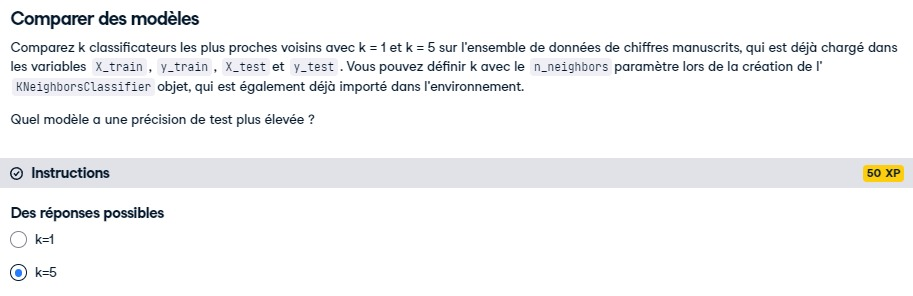

***Super! Vous venez de faire un peu de sélection de modèles !***

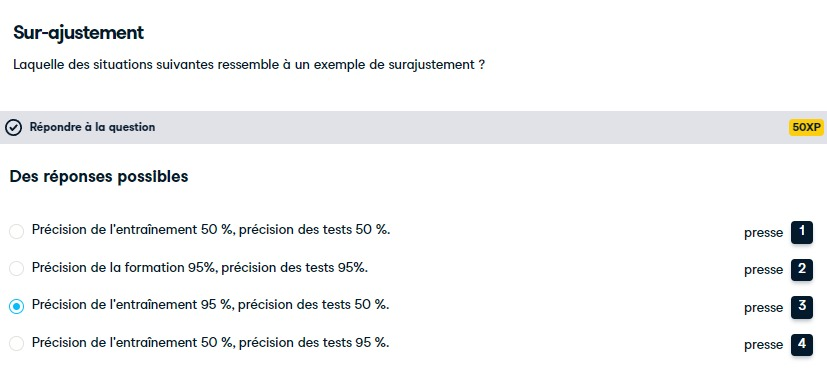

***Bon travail! On dirait que vous comprenez le surajustement.***

####**1. Application de la régression logistique et du SVM**

+ ***Dans cette vidéo, nous verrons comment exécuter la régression logistique et SVM avec scikit-learn.***

####**2. Utilisation de la régression logistique**

+ ***La classe LogisticRegression dans scikit-learn est utilisée comme les autres modèles que vous avez vus dans le cours préalable. Tout d'abord, nous importons LogisticRegression de scikit learn. Vous remarquerez que nous importons depuis linear_model, car la régression logistique est un classificateur linéaire. Plus à ce sujet plus tard. Ensuite, nous instancions une instance du classifieur. Nous adaptons le classifieur sur notre ensemble d'entraînement. Et puis on peut prédire, calculer le score, etc.***

####**3. Exemple de régression logistique**

+ ***Essayons cela sur un exemple d'ensemble de données, dans ce cas l'ensemble de données de classification des vins intégré à scikit-learn. Nous chargeons le jeu de données. Ensuite, nous créons et ajustons un objet LogisticRegression. Nous calculons la précision de l'entraînement et constatons qu'elle est d'environ 97 %. LogisticRegression de scikit-learn peut également produire des scores de confiance plutôt que des prédictions "dures" ou définitives. Faisons cela avec la fonction "predict_proba" et testons-la sur le premier exemple d'entraînement. Ici, le classificateur rapporte plus de 99 % de confiance pour la première classe et de très faibles probabilités pour les deux autres. Pour rappel, le petit e signifie "10 à la puissance de", vous devez donc interpréter cette première probabilité comme 9 point 9 fois 10 à la puissance -1, ou point 99, ou 99 %. Nous discuterons plus en détail de ces probabilités au chapitre 3.***

####**4. Utilisation de LinearSVC**

+ ***Dans scikit-learn, le classificateur SVM de base est appelé LinearSVC pour classificateur de vecteur de support linéaire. L'objet LinearSVC fonctionne exactement de la même manière que LogisticRegression. Notez que cet ensemble de données a plus de 2 classes. Les implémentations de régression logistique et SVM de scikit-learn gèrent cela automatiquement. Nous verrons comment cela fonctionne au chapitre 3.***

####**5. Utiliser SVC**

+ ***Nous pouvons répéter ces étapes pour la classe "SVC", qui correspond par défaut à une SVM non linéaire. Avec les hyperparamètres par défaut, la précision n'est pas particulièrement élevée, mais il est possible d'ajuster les hyperparamètres de ce modèle non linéaire pour obtenir une précision d'entraînement de 100 %. Un tel classificateur pourrait être surajusté, ce qui est un risque que nous prenons lorsque nous utilisons des modèles plus complexes comme les SVM non linéaires. Plus loin dans ce chapitre, nous discuterons de ce que cela signifie pour un classifieur d'être linéaire ou non. Soit dit en passant, jusqu'à présent, nous avons utilisé les hyperparamètres par défaut pour LogisticRegression, LinearSVC et SVC. Pour vous rappeler, un hyperparamètre est un choix sur le modèle que vous faites avant de l'ajuster aux données, et contrôle souvent la complexité du modèle. Si le modèle est trop simple, il peut être incapable de capturer les modèles dans les données, ce qui entraîne une faible précision de formation ; c'est ce qu'on appelle le sous-ajustement. D'un autre côté, si le modèle est trop complexe, il peut apprendre les particularités de votre ensemble d'apprentissage particulier, ce qui entraîne une moindre précision du test ; c'est ce qu'on appelle le surajustement. Il s'agit d'un compromis fondamental en apprentissage automatique. Dans les chapitres 3 et 4, nous approfondirons ces classificateurs afin que, à la fin du cours, vous compreniez ce que représentent de nombreux hyperparamètres, comment ils affectent ce compromis fondamental et comment s'y prendre pour les définir. .***

####**6. Entraînons-nous !**

+ ***C'est maintenant à vous d'appliquer ces classificateurs.***

###**EXERCICES**
####**Exécution de LogisticRegression et SVC**
+ ***Dans cet exercice, vous appliquerez la régression logistique et une machine à vecteurs de support pour classer les images de chiffres manuscrits.***

####**Instructions**

+ Appliquez la régression logistique et le SVM (à l'aide de SVC()) à l'ensemble de données de chiffres manuscrits à l'aide de la division train/validation fournie.
+ Pour chaque classificateur, imprimez la précision de la formation et de la validation.

In [9]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(lr.score(digits.data, digits.target))

0.9555555555555556
0.9888703394546466


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Apply SVM and print scores
svm = SVC()
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))
print(svm.score(digits.data, digits.target))

0.9866666666666667
0.9922092376182526


***Bien fait! Plus tard dans le cours, nous examinerons les similitudes et les différences entre la régression logistique et les SVM.***

####**Analyse des sentiments pour les critiques de films**

+ ***Dans cet exercice, vous allez explorer les probabilités générées par la régression logistique sur un sous-ensemble de [l' ensemble de données Large Movie Review](https://ai.stanford.edu/~amaas/data/sentiment/) .***

+ ***Les variables $X$ et $y$ sont déjà chargées dans l'environnement. $X$ contient des fonctionnalités basées sur le nombre de fois que des mots apparaissent dans les critiques de films et $y$ contient des étiquettes indiquant si le sentiment de la critique est positif (+1) ou négatif (-1).***

####**Instructions**

+ Entraînez un modèle de régression logistique sur les données des critiques de films.
+ Prédisez les probabilités de négatif par rapport à positif pour les deux avis donnés.
+ N'hésitez pas à écrire vos propres critiques et à obtenir des probabilités pour celles-ci également !

In [11]:
# Instantiate logistic regression and train
lr = LogisticRegression()
#lr.fit(X,y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
#review1_features = get_features(review1)
print("Review:", review1)
#print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
#review2_features = get_features(review2)
print("Review:", review2)
#print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

Review: LOVED IT! This movie was amazing. Top 10 this year.
Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.


***Fantastique! La deuxième probabilité aurait été encore plus faible, mais le mot "bon" la fait un peu trébucher, car c'est considéré comme un mot "positif".***

####**1. Limites de décision linéaires**

+ ***Dans cette vidéo, nous allons discuter de ce que cela signifie pour un classificateur d'être linéaire.***

####**2. Limites de décision linéaires**

+ ***Une frontière de décision nous indique quelle classe notre classificateur prédira pour toute valeur de $x$. Dans cette image, le classificateur prédit la classe bleue dans la zone ombrée bleue, où la caractéristique 2 est petite, et la classe rouge dans la zone ombrée rouge, où la caractéristique 2 est grande. La ligne de démarcation entre les deux régions est appelée frontière de décision. Cette limite de décision est considérée comme linéaire car elle ressemble à une ligne. La ligne n'a pas besoin d'être horizontale ; il pourrait être dans n'importe quelle orientation. Cette définition s'étend également à plus de 2 fonctionnalités. Avec 5 caractéristiques, l'espace des valeurs $x$ possibles est à 5 dimensions, ce qui m'est difficile de dessiner sur une diapositive ! Dans ce cas, la frontière serait un "hyperplan" de dimension supérieure coupant l'espace en deux moitiés. Une frontière non linéaire est tout autre type de frontière. Parfois, cela conduit à des régions non contiguës d'une certaine prédiction, comme sur la figure. Dans leurs formes de base, la régression logistique et les SVM sont des classificateurs linéaires, ce qui signifie qu'ils apprennent les limites de décision linéaires. Au chapitre 4, nous discuterons des versions non linéaires qui produisent des frontières comme celle de droite.***

####**3. Définitions**

+ ***Voici une liste de vocabulaire important que nous utiliserons dans le cours. La classification est un apprentissage supervisé lorsque les valeurs $y$ sont des catégories ; cela contraste avec la régression, où nous essayons de prédire une valeur continue. Nous avons défini les limites de décision et les classificateurs linéaires sur la diapositive précédente. Un ensemble de données est dit linéairement séparable s'il peut être parfaitement expliqué par un classifieur linéaire.***

####**4. Données linéairement séparables**

+ ***Voici un exemple d'un ensemble de données qui est linéairement séparable et qui ne l'est pas. Dans la figure de gauche, aucune ligne ne sépare les exemples rouge et bleu. Notez que pour l'instant nous ne parlons que de classification binaire, ou à 2 classes. Plus tard dans le cours, nous discuterons de la classification multi-classes (avec 3 catégories ou plus). D'autre part, dans la figure de droite, nous pourrions diviser les deux classes par une ligne droite, c'est ce qu'on appelle linéairement séparable.***

####**5. Entraînons-nous !**

+ ***Donc, si la régression logistique et les SVM linéaires sont tous deux des classificateurs linéaires, en quoi sont-ils différents ? C'est de cela qu'il s'agit dans le chapitre 2. Examinons d'autres exemples de limites de décision linéaires et non linéaires.***

###**EXERCICES**

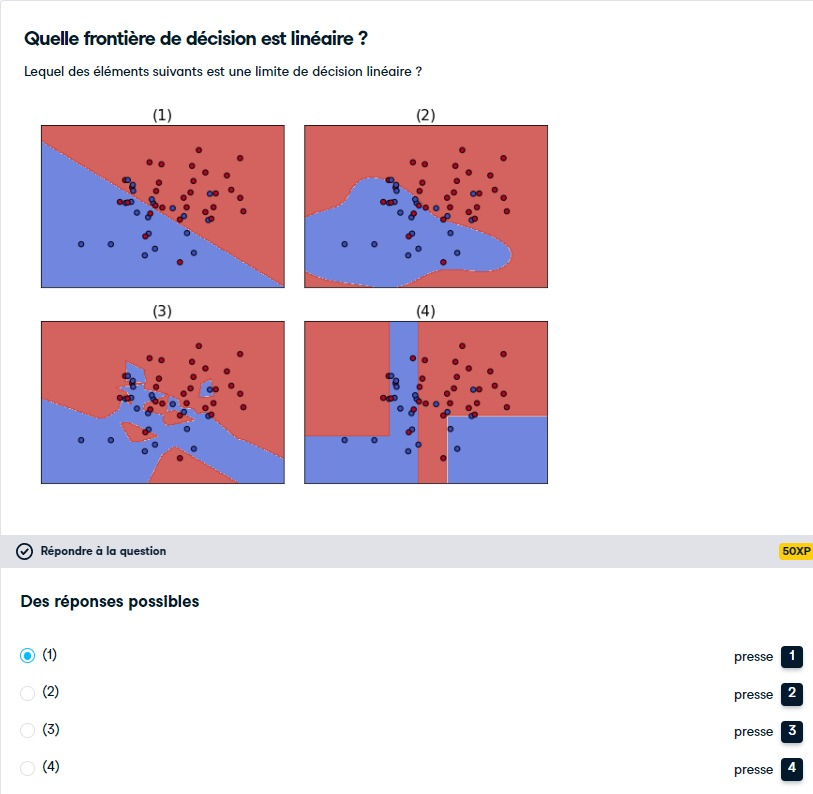

***Bon travail! Vous avez correctement identifié la limite de décision linéaire.***

####**Visualiser les limites de décision**

+ ***Dans cet exercice, vous allez visualiser les limites de décision de différents types de classificateurs.***

+ ***Un sous-ensemble de l'ensemble de données scikit-learnintégré winede est déjà chargé dans $X$, ainsi que des étiquettes binaires dans $y$.***

####**Instructions**

+ Créez les objets classificateurs suivants avec les hyperparamètres par défaut : LogisticRegression, LinearSVC, SVC, KNeighborsClassifier.
+ Ajustez chacun des classificateurs aux données fournies à l'aide d'une boucle for.
+ Appelez la fonction plot_4_classifers() (similaire au code ici ), en passant X, y, et une liste contenant les quatre classificateurs.

In [12]:
import matplotlib.pyplot as plt

In [13]:
#hide
X = np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])

In [14]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [15]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [16]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [17]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-16-03592ebd08ef>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-16-03592ebd08ef>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
<ipython-input-16-03592ebd08ef>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-16-03592ebd08ef>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
<ipython-input-16-03592ebd08ef>:22: UserWar

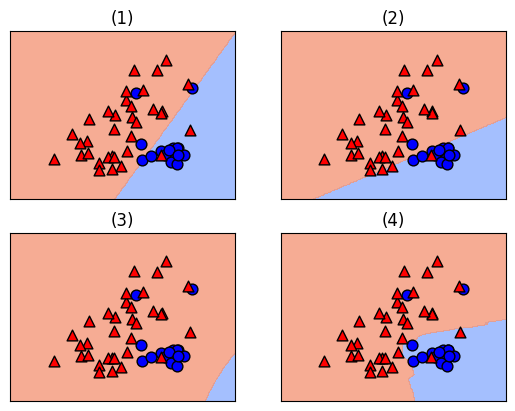

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

+ ***Bon! Comme vous pouvez le voir, la régression logistique et le SVM linéaire sont des classificateurs linéaires alors que KNN ne l'est pas. La SVM par défaut est également non linéaire, mais cela est difficile à voir dans le tracé car elle fonctionne mal avec les hyperparamètres par défaut. Avec de meilleurs hyperparamètres, il fonctionne bien.***

####**1. Classificateurs linéaires : équations de prédiction**

+ ***Bienvenue au chapitre 2. Ce chapitre est beaucoup plus conceptuel que les autres chapitres, car nous poserons les bases pour comprendre la régression logistique et les SVM. Nous allons commencer par explorer quelques mathématiques derrière les classificateurs linéaires dans cette vidéo. En creusant vraiment dans les détails, vous serez mieux équipé pour comparer ces classificateurs à d'autres modèles et interpréter les résultats.***

####**2. Produits scalaires**

+ ***Nous allons commencer par définir un produit scalaire. Créons des tableaux numpy $x$ et $y$. Pour prendre le produit scalaire entre eux, nous devons les multiplier élément par élément. Le résultat est 0 (de 0 fois 3), 4 (de 1 fois 4) et 10 (de 2 fois 5). La somme de ces nombres, également connue sous le nom de produit scalaire, est 14. Une notation pratique pour cela dans les versions récentes de Python est le symbole "arobase". `x@y` nous donne le même résultat. En notation mathématique, cela s'écrit "$x$ point $y$". Vous pouvez considérer un produit scalaire comme une multiplication dans des dimensions supérieures, puisque $x$ et $y$ sont des tableaux de valeurs.***

####**3. Prédiction du classificateur linéaire**

+ ***En utilisant des produits scalaires, nous pouvons exprimer comment les classificateurs linéaires font des prédictions. Tout d'abord, nous calculons ce que nous appellerons la "sortie brute du modèle", qui est le produit scalaire des coefficients et des caractéristiques, plus une interception. On prendra alors le signe de cette quantité, c'est-à-dire qu'on vérifiera si elle est positive ou négative. C'est une équation clé du cours. Fondamentalement, ce modèle est le même pour la régression logistique et les SVM linéaires. En termes scikit-learn, nous pouvons dire que la régression logistique et la SVM linéaire ont des fonctions d'ajustement différentes mais la même fonction de prédiction. Les différences d'"ajustement" concernent les fonctions de perte, qui seront présentées plus loin dans ce chapitre.***

####**4. Comment LogisticRegression fait des prédictions**

+ ***Voyons cette équation en action avec l'ensemble de données de classification du cancer du sein de scikit-learn. Nous créons un objet de régression logistique, l'ajustons aux données et examinons les prédictions des exemples 10 et 20, qui sont 0 et 1.***

####**5. Comment LogisticRegression fait des prédictions (suite)**

+ ***Creusons maintenant plus profondément. Nous pouvons obtenir les coefficients appris et les intercepter avec lr.coef et lr.intercept. Calculons la sortie brute du modèle par exemple 10. Elle est négative : c'est pourquoi nous prédisons la classe négative, appelée "0" dans cet ensemble de données. D'autre part, par exemple 20, la sortie brute du modèle est positive : nous prédisons donc l'autre classe, appelée "1" dans cet ensemble de données. En général, c'est ce que fait la fonction de prédiction pour tout $X$ : elle calcule la sortie brute du modèle, vérifie si elle est positive ou négative, puis renvoie un résultat basé sur les noms des classes de votre ensemble de données, dans ce cas 0 et 1.***

####**6. La sortie brute du modèle**

+ ***Regardons visuellement notre équation de prédiction. Cette figure montre un exemple en 2 dimensions, avec la sortie brute du modèle étiquetée à quelques emplacements. Au fur et à mesure que nous nous éloignons de la limite d'un côté, la sortie devient de plus en plus négative. D'un autre côté, cela devient de plus en plus positif. Ainsi, le signe, positif ou négatif, vous indique de quel côté de la limite de décision vous vous trouvez, et donc votre prédiction. Le long de la limite de décision elle-même, la sortie brute du modèle est nulle. De plus, les valeurs des coefficients et de l'ordonnée à l'origine déterminent la frontière.***

####**7. La sortie brute du modèle**

+ ***Par exemple, ici, j'ai changé l'interception de la frontière. La sortie brute du modèle aux mêmes 3 points a changé parce que nous avons changé l'interception. La limite s'est déplacée vers le bas et vers la gauche. Pour changer l'orientation de la frontière, nous pouvons changer les coefficients.***

####**8. La sortie brute du modèle**

+ ***Ici, nous examinons différents coefficients. Cela modifie l'orientation de la limite de décision. En fait, les trois points que nous examinions sont maintenant tout le long de la frontière.***

####**9. Entraînons-nous !**

+ ***Continuons à explorer ces effets.***

###**EXERCICES**

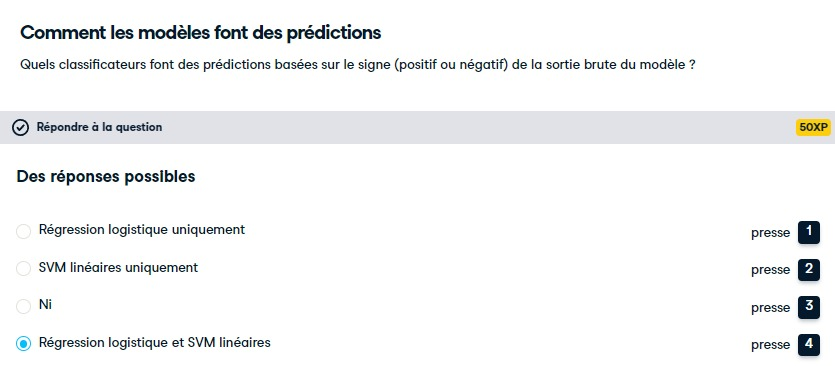

***Bon! De plus, étant donné que la régression logistique et les SVM sont tous deux des classificateurs linéaires, la sortie brute du modèle est une fonction linéaire de $x$.***

####**Modification des coefficients du modèle**
+ ***Lorsque vous appelez fitavec scikit-learn, les coefficients de régression logistique sont automatiquement appris à partir de votre ensemble de données. Dans cet exercice, vous explorerez comment la frontière de décision est représentée par les coefficients. Pour ce faire, vous allez modifier les coefficients manuellement (au lieu d'utiliser fit), et visualiser les classificateurs résultants.***

+ ***Un jeu de données 2D est déjà chargé dans l'environnement en tant que $X$ et $y$, avec un objet classificateur linéaire model.***

####**Instructions**

+ Réglez les deux coefficients et l'ordonnée à l'origine sur différentes valeurs et observez les limites de décision résultantes.
+ Essayez de vous faire une idée de la relation entre les coefficients et la limite de décision.
+ Définissez les coefficients et interceptez de telle sorte que le modèle ne fasse aucune erreur sur les données d'apprentissage données.

In [19]:
#hide
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [20]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

<ipython-input-20-a79d2197be34>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-20-a79d2197be34>:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


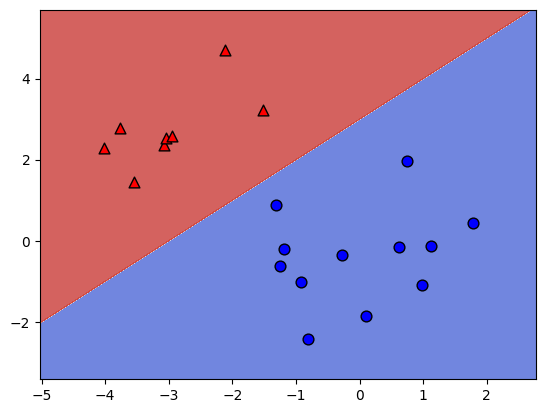

In [22]:
# Set the coefficients
model.coef_ = np.array([[-1,1]])
model.intercept_ = np.array([-3])

# Plot the data and decision boundary
plot_classifier(X,y,model)

In [23]:
# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

Number of errors: 0


***Bon travail! Comme vous l'avez constaté, les coefficients déterminent la pente de la limite et l'interception la déplace.***

####**1. Qu'est-ce qu'une fonction de perte ?**

+ ***Dans cette vidéo, nous allons lancer notre discussion sur les fonctions de perte. De nombreux algorithmes d'apprentissage automatique impliquent de minimiser une perte, et en comprenant cette perspective, vous serez équipé des outils pour voir les connexions entre les modèles, en saisir rapidement de nouveaux et commencer à les adapter à votre problème de science des données.***

####**2. Moindres carrés : la perte au carré**

+ ***Nous avons déjà vu les fonctions de perte dans le cours préalable sur l'apprentissage supervisé. Par exemple, la régression linéaire des moindres carrés, telle que la classe LinearRegression de scikit-learn, minimise la somme des carrés des erreurs commises sur votre ensemble d'apprentissage. Ici, l'erreur est définie comme la différence entre la vraie valeur cible et la valeur cible prédite. Vous pouvez penser à minimiser la perte en secouant les coefficients ou les paramètres du modèle jusqu'à ce que ce terme d'erreur, ou fonction de perte, soit aussi petit que possible. En d'autres termes, la fonction de perte est un score de pénalité qui nous indique à quel point (ou, pour être précis, à quel point) le modèle se comporte bien sur les données d'apprentissage. Nous pouvons considérer la fonction "fit" comme un code en cours d'exécution qui minimise la perte. Notez que la fonction de score fournie par scikit-learn n'est pas t nécessairement la même chose que la fonction de perte. La perte est utilisée pour ajuster le modèle aux données, et le score est utilisé pour voir dans quelle mesure nous nous en sortons. Il est intuitif que ce soient les mêmes, et ils le sont souvent, mais vous devez savoir que ce n'est pas garanti.***

####**3. Erreurs de classement : la défaite 0-1**

+ ***L'erreur quadratique de LinearRegression n'est pas appropriée pour les problèmes de classification, car nos valeurs y sont des catégories, pas des nombres. Pour la classification, une quantité naturelle à laquelle il faut penser est le nombre d'erreurs que nous avons commises. Puisque nous aimerions le rendre aussi petit que possible, le nombre d'erreurs pourrait être une bonne fonction de perte. Nous appellerons cette fonction de perte la perte 0-1, car elle est définie comme étant soit 0 (si votre prédiction est correcte) soit 1 (si votre prédiction est fausse). En additionnant cette fonction sur tous les exemples d'apprentissage, nous obtenons le nombre d'erreurs que nous avons commises sur l'ensemble d'apprentissage, puisque nous ajoutons 1 au total pour chaque erreur. Bien que la perte 0-1 soit importante pour notre parcours conceptuel, il s'avère très difficile de la minimiser directement dans la pratique, c'est pourquoi la régression logistique et les SVM ne l'utilisent pas.***

####**4. Minimiser une perte**

+ ***Dans les exercices, vous allez essayer de minimiser une fonction de perte à l'aide d'un package Python appelé scipy-dot-optimize-dot-minimize, qui peut minimiser toutes sortes de fonctions. Essayons. Ici, je vais minimiser la fonction y=x^2, qui est calculée à l'aide de numpy.square. Le deuxième argument est notre estimation initiale. Essayons zéro. Enfin, j'ai "point x" à la fin pour saisir la valeur d'entrée qui rend la fonction aussi petite que possible. Nous avons obtenu zéro car cette fonction est minimisée lorsque x=0. Mais ce n'est pas trop intéressant, puisque notre hypothèse initiale était la bonne réponse ! C'est correct parce que quelque chose au carré ne peut être que zéro ou plus, ainsi, sa plus petite valeur possible est atteinte lorsque x=0. Essayons une autre supposition initiale pour voir s'il fait réellement quelque chose. Ce que nous voyons est un très petit nombre, proche de 10 à la puissance -8. C'est normal pour l'optimisation numérique : on n'attend pas exactement la bonne réponse, mais quelque chose de très proche. Dans les exercices, vous minimiserez l'erreur quadratique de la régression linéaire. Les entrées seront les coefficients du modèle. Ainsi, vous pouvez considérer le code comme répondant à la question "quelles valeurs des coefficients du modèle rendent mon erreur quadratique aussi petite que possible ?" C'est exactement ce que fait la régression linéaire.***

####**5. Entraînons-nous !**

+ ***Il est temps de faire quelques exercices sur les fonctions de perte.***

###**EXERCICES**

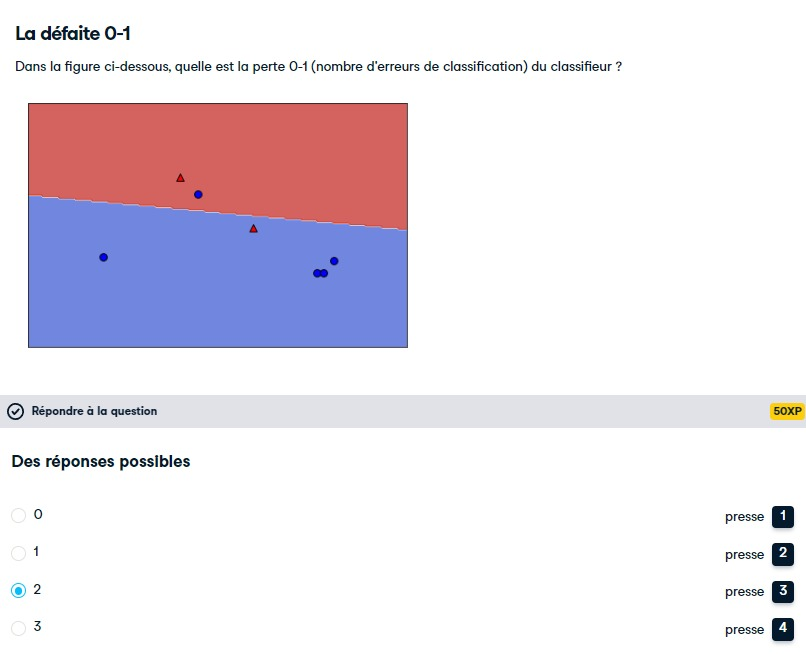

***Correct! Il y a 1 point rouge mal classé et 1 point bleu mal classé.***

####**Minimiser une fonction de perte**

+ ***Dans cet exercice, vous allez implémenter une régression linéaire "à partir de zéro" à l'aide de `scipy.optimize.minimize`.***

+ *Nous formerons un modèle sur l'ensemble de données sur le prix des logements à Boston, qui est déjà chargé dans les variables $X$ et $y$. Pour plus de simplicité, nous n'inclurons pas d'ordonnée à l'origine dans notre modèle de régression.*

####**Instructions**

+ Remplissez la fonction de perte pour la régression linéaire des moindres carrés.
+ Imprimez les coefficients de l'ajustement de sklearn LinearRegression.

In [24]:
X = pd.read_csv('boston_X.csv').to_numpy()
y = pd.read_csv('boston_y.csv').to_numpy()

In [25]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression


# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.16299821e-02  4.86754487e-02 -3.77639695e-03  2.85635666e+00
 -2.88069820e+00  5.92521888e+00 -7.22455458e-03 -9.67993692e-01
  1.70448535e-01 -9.38967901e-03 -3.92422282e-01  1.49830711e-02
 -4.16972458e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


***Bon travail! C'était difficile. N'est-ce pas cool de reproduire les poids appris par scikit-learn?***

####**1. Diagrammes de la fonction de perte**

+ ***Cette vidéo, sur les diagrammes de fonction de perte, est probablement la vidéo la plus conceptuellement difficile du cours. Mais lorsque nous aurons terminé, nous verrons exactement ce que sont la régression logistique et les SVM linéaires, ce qui nous amènera, dans les prochains chapitres, à comprendre pourquoi ils se comportent différemment. Accrochez-vous!***

####**2. La sortie brute du modèle**

+ ***Nous voulons dessiner des fonctions de perte, alors établissons un graphique avec la perte sur l'axe vertical. Sur l'axe horizontal, nous tracerons la sortie brute du modèle. Puisque nous prédisons en utilisant le signe de la sortie brute du modèle, le tracé est divisé en deux moitiés : dans la moitié gauche, nous prédisons une classe (appelons-la -1) et dans la moitié droite, nous prédisons l'autre classe (appelons-la +1 ). Pour être concret, concentrons-nous sur un exemple de formation en classe +1. Ensuite, la moitié droite représente les prédictions correctes et la moitié gauche représente les prédictions incorrectes.***

####**3. Diagramme de perte 0-1**

+ ***Dessinons maintenant notre défaite 0-1 sur l'image. Selon la définition de la défaite 0-1, des prédictions incorrectes ou des erreurs, obtenez une pénalité de 1 et les prédictions correctes n'obtiennent aucune pénalité. Il est important de distinguer ce diagramme des tracés des limites de décision précédents : ici, les axes ne sont pas deux caractéristiques, mais plutôt la sortie brute du modèle et la perte, quel que soit le nombre de caractéristiques dont nous disposons. Gardez également à l'esprit que cette image représente la perte pour un exemple de formation particulier : pour obtenir la perte totale, nous devons résumer la contribution de tous les exemples.***

####**4. Diagramme de perte de régression linéaire**

+ ***En utilisant ce type de diagramme, nous pouvons tirer la perte de la régression linéaire des moindres carrés. Comme son nom l'indique, il s'agit d'une fonction au carré ou quadratique. Dans la régression linéaire, la sortie brute du modèle est la prédiction. Intuitivement, la perte est plus élevée car la prédiction est plus éloignée de la véritable valeur cible, que nous supposons égale à 1 dans ce cas. Bien que cette intuition ait du sens pour la régression linéaire, elle n'a pas de sens pour un classificateur linéaire : pour nous, être vraiment proche de la vraie valeur n'a pas d'importance, tant que nous obtenons le bon signe. Nous pouvons voir ce problème sur la photo. Le bras gauche de la courbe est OK : la perte est importante pour les mauvaises réponses. Mais le bras droit est problématique : si la sortie brute du modèle est importante et positive, la perte augmente même si nous prédisons correctement +1. Depuis que nous' réajuster un modèle en minimisant la perte, cela signifie que des modèles parfaitement bons sont considérés comme "mauvais" par la perte. C'est pourquoi nous avons besoin de fonctions de perte spécialisées pour la classification et ne pouvons pas simplement utiliser l'erreur quadratique de la régression linéaire. Regardons maintenant la perte logistique utilisée dans la régression logistique.***

####**5. Diagramme de perte logistique**

+ ***C'est la perte logistique. Vous pouvez le considérer comme une version fluide de la perte 0-1. Il a les propriétés que l'on veut : au fur et à mesure que l'on se déplace vers la droite, vers la zone des prédictions correctes, la perte diminue. Nous n'avons plus l'interprétation en nombre d'erreurs, mais, contrairement à la défaite 0-1, nous pouvons minimiser cela facilement dans la pratique.***

####**6. Diagramme de perte de charnière**

+ ***Il s'agit de la perte charnière, utilisée dans les SVM.***

####**7. Diagramme de perte de charnière**

+ ***La forme générale est la même que pour la perte logistique : les deux pénalisent les prédictions erronées. Ces diagrammes de fonction de perte capturent l'essence de la régression logistique et des SVM. Il y a certainement beaucoup plus de détails à venir, mais nous avons également fait beaucoup de progrès.***

####**8. Entraînons-nous !**

+ ***Examinons ces nouvelles fonctions de perte.***

###**EXERCICES**

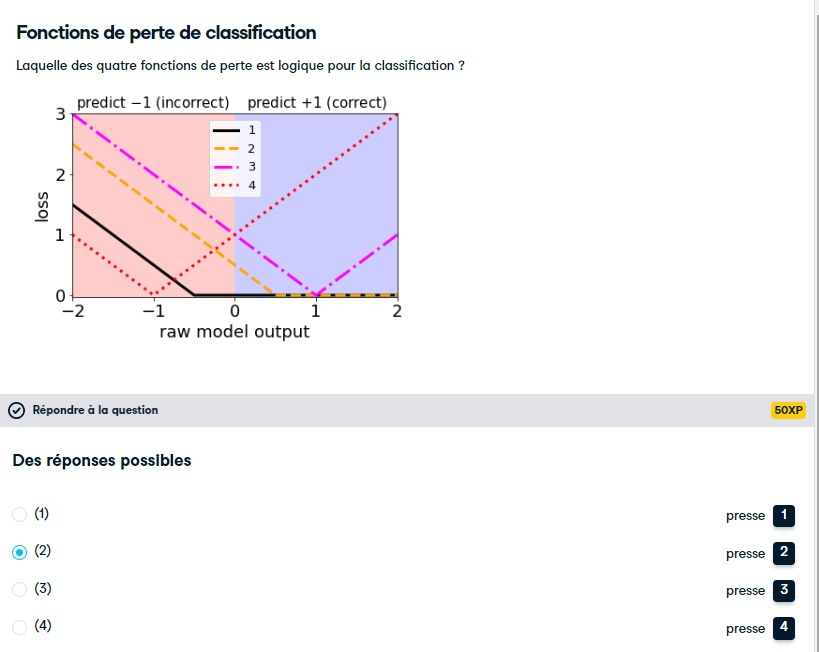

***Correct! Cette perte est très similaire à la perte de charnière utilisée dans les SVM (juste légèrement décalée).***


####**Comparaison des pertes logistiques et charnières**
+ ***Dans cet exercice, vous allez créer un graphique des pertes logistiques et charnières à l'aide de leurs expressions mathématiques, qui vous sont fournies.***

+ *Le diagramme de la fonction de perte de la vidéo est présenté à droite.*

####**Instructions**

+ Évaluez les fonctions log_loss() et hinge_loss() aux points de la grille afin qu'ils soient tracés.

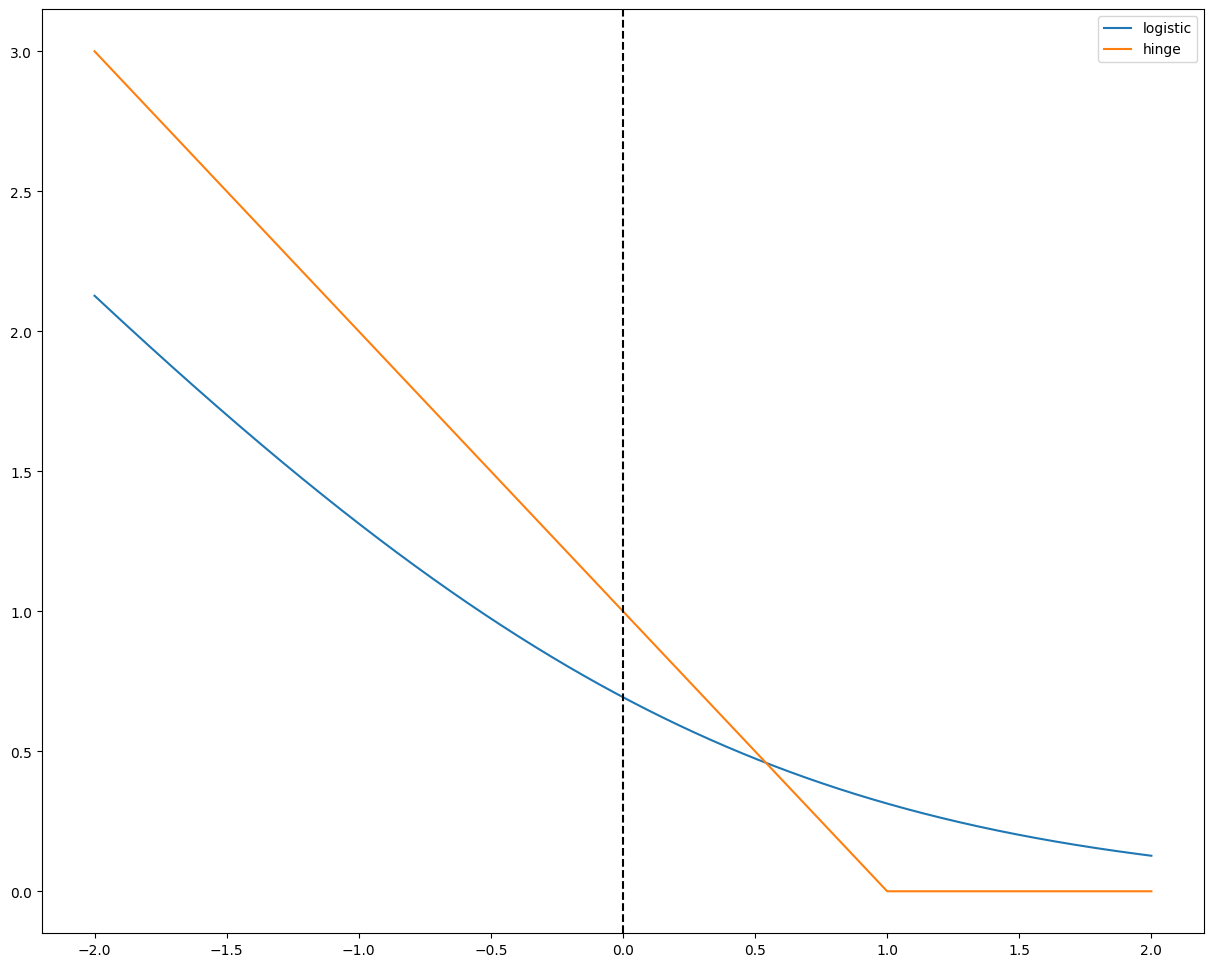

In [26]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.figure(figsize=(15,12))
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.axvline(x=0, linestyle='dashed', color='k')
plt.legend()
plt.show()

***Bon! Comme vous pouvez le voir, ceux-ci correspondent aux diagrammes de fonction de perte que nous avons vus dans la vidéo.***

####**Mise en œuvre de la régression logistique**

+ ***Ceci est très similaire à l'exercice précédent où vous avez implémenté la régression linéaire "à partir de zéro" en utilisant scipy.optimize.minimize. Cependant, cette fois, nous allons minimiser la perte logistique et comparer avec scikit-learn LogisticRegression(nous avons défini Cune valeur élevée pour désactiver la régularisation ; plus d'informations à ce sujet au chapitre 3 !).***

+ *La fonction log_loss() de l'exercice précédent est déjà définie dans votre environnement et l' ensemble de données de prédiction du cancer du sein sklearn (10 premières caractéristiques, normalisées) est chargé dans les variables $X$ et $y$.*

####**Instructions**

+ Entrez le nombre d'exemples de formation dans range().
+ Remplissez la fonction de perte pour la régression logistique.
+ Comparez les coefficients à ceux de sklearn LogisticRegression.

In [27]:
X = pd.read_csv('breast_X.csv').to_numpy()
y = pd.read_csv('breast_y.csv').to_numpy()

In [28]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

In [29]:
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[ 1.03607194 -1.65378471  4.08316467 -9.40924011 -1.06786722  0.07892863
 -0.85110337 -2.44102856 -0.45285651  0.43353569]


In [30]:
# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Bon travail! Comme vous pouvez le voir, la régression logistique minimise simplement la fonction de perte que nous avons examinée. Beaucoup plus sur la régression logistique dans le chapitre suivant !***

####**1. Régression logistique et régularisation**
+ ***Bienvenue au chapitre 3 ! Dans ce chapitre, nous utiliserons les compétences pratiques du chapitre 1 et les concepts du chapitre 2 pour approfondir la régression logistique.***

####**2. Régression logistique régularisée**

+ ***Le cours préalable, "apprentissage supervisé avec scikit-learn", mentionne que la régularisation combat le surajustement en réduisant les coefficients du modèle. La figure montre les coefficients appris d'un modèle de régression logistique avec régularisation par défaut. Dans scikit-learn, l'hyperparamètre "$C$" est l'inverse de la force de régularisation. En d'autres termes, un C plus grand signifie moins de régularisation et un $C$ plus petit signifie plus de régularisation. Testons cela.***

####**3. Régression logistique régularisée**

+ ***La courbe orange montre ce qui se passe si nous utilisons une valeur plus petite de $C$, ce qui signifie plus de régularisation pour notre modèle de régression logistique. Comme prévu, la régularisation rend les coefficients plus petits.***

####**4. Comment la régularisation affecte-t-elle la précision de l'entraînement ?**

+ ***Voyons comment la régularisation influence la formation et la précision des tests. Avec l'ensemble de données de critiques de films déjà chargé et divisé en ensembles d'entraînement et de test, nous instancions deux modèles de régression logistique, l'un avec une régularisation faible et l'autre avec une régularisation forte. Nous adaptons ensuite les deux modèles. Ensuite, nous calculons la précision de l'entraînement. Le modèle avec une régularisation faible obtient une précision d'entraînement plus élevée. Maintenant que nous avons étudié les fonctions de perte, nous pouvons voir pourquoi la régularisation fait baisser la précision de l'apprentissage : la régularisation est un terme supplémentaire que nous ajoutons à la fonction de perte d'origine, ce qui pénalise les grandes valeurs des coefficients. Intuitivement, sans régularisation, nous maximisons la précision de la formation, donc nous réussissons bien sur cette métrique. Lorsque nous ajoutons une régularisation, nous modifions la fonction de perte pour pénaliser les grands coefficients, ce qui détourne l'attention de l'objectif d'optimisation de la précision. Plus la pénalité de régularisation est grande (ou plus nous fixons $C$ petit), plus nous nous écartons de notre objectif de maximisation de la précision de l'entraînement. Par conséquent, la précision de l'entraînement diminue.***

####**5. Comment la régularisation affecte-t-elle la précision du test ?**

+ ***Regardons la précision du test cette fois. Comme on peut le voir, la régularisation l'a amélioré. Nous avons expliqué pourquoi la régularisation réduit la précision de l'entraînement, mais pourquoi améliore-t-elle la précision des tests ? Imaginez que vous n'ayez pas accès à une fonctionnalité particulière ; c'est comme mettre le coefficient correspondant à zéro. La régularisation, et donc la réduction de votre coefficient, est comme un compromis entre ne pas utiliser du tout la fonctionnalité (mettre le coefficient à zéro) et l'utiliser pleinement (la valeur du coefficient non régularisé). Si l'utilisation trop intensive d'une fonctionnalité provoquait un surajustement, la régularisation vous amène à "moins d'ajustement" et donc moins d'ajustement.***

####**6. Régularisation $L1$ vs $L2$**

+ ***Pour la régression linéaire, nous utilisons les termes Ridge et Lasso pour deux types de régularisation différents. Les noms généraux de ces concepts, en dehors de la régression linéaire, sont la régularisation L1 et la régularisation $L2$. Tout ce que vous avez appris sur la crête (ou $L2$) et le lasso (ou $L1$) dans le passé s'applique également à la régression logistique. Par exemple, les deux aident à réduire le surajustement et L1 effectue également la sélection des fonctionnalités. À titre d'exemple, entraînons deux modèles de régression logistique, avec régularisation $L1$ et $L2$, sur l'ensemble de données sur le cancer du sein après mise à l'échelle, ce qui est généralement une bonne pratique, en particulier lors de l'utilisation de la régularisation. Nous pouvons tracer les coefficients pour les deux modèles, en ajoutant une grille afin que nous puissions voir où se trouve zéro. Notez l'argument "solveur" utilisé lors de la création du modèle avec la régularisation $L1$. Cet argument contrôle la méthode d'optimisation utilisée pour trouver les coefficients. Nous devons le définir ici car le solveur par défaut n'est pas compatible avec la régularisation $L1$.***

####**7. Régularisation L2 vs L1**

+ ***Voici les parcelles. Comme vous pouvez le voir, la régularisation $L1$ a défini de nombreux coefficients sur zéro, ignorant ainsi ces caractéristiques ; en d'autres termes, il a effectué la sélection des fonctionnalités pour nous. D'autre part, la régularisation $L2$ réduit simplement les coefficients pour qu'ils soient plus petits. Ceci est analogue à ce qui se passe avec la régression Lasso et Ridge.***

####**8. Entraînons-nous !**

+ ***C'est maintenant à votre tour d'explorer la régularisation pour la régression logistique.***

###**EXERCICES**

####**Régression logistique régularisée**
+ ***Au chapitre 1, vous avez utilisé la régression logistique sur l'ensemble de données manuscrites. Ici, nous allons explorer l'effet de la régularisation $L2$.***

+ *L'ensemble de données de chiffres manuscrits est déjà chargé, divisé et stocké dans les variables X_train, y_train, X_valid et y_valid. Les variables train_errs et valid_errs sont déjà initialisées en tant que listes vides.*

####**Instructions**

+ Bouclez sur les différentes valeurs de C_value, en créant et en ajustant un modèle LogisticRegression à chaque fois.
+ Enregistrez l'erreur sur l'ensemble d'apprentissage et l'ensemble de validation pour chaque modèle.
+ Créez un graphique de l'erreur d'entraînement et de test en fonction du paramètre de régularisation, C.
+ En regardant l'intrigue, quelle est la meilleure valeur de C?

In [31]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
digits = load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

In [33]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values :
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit( X_train,y_train)

    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

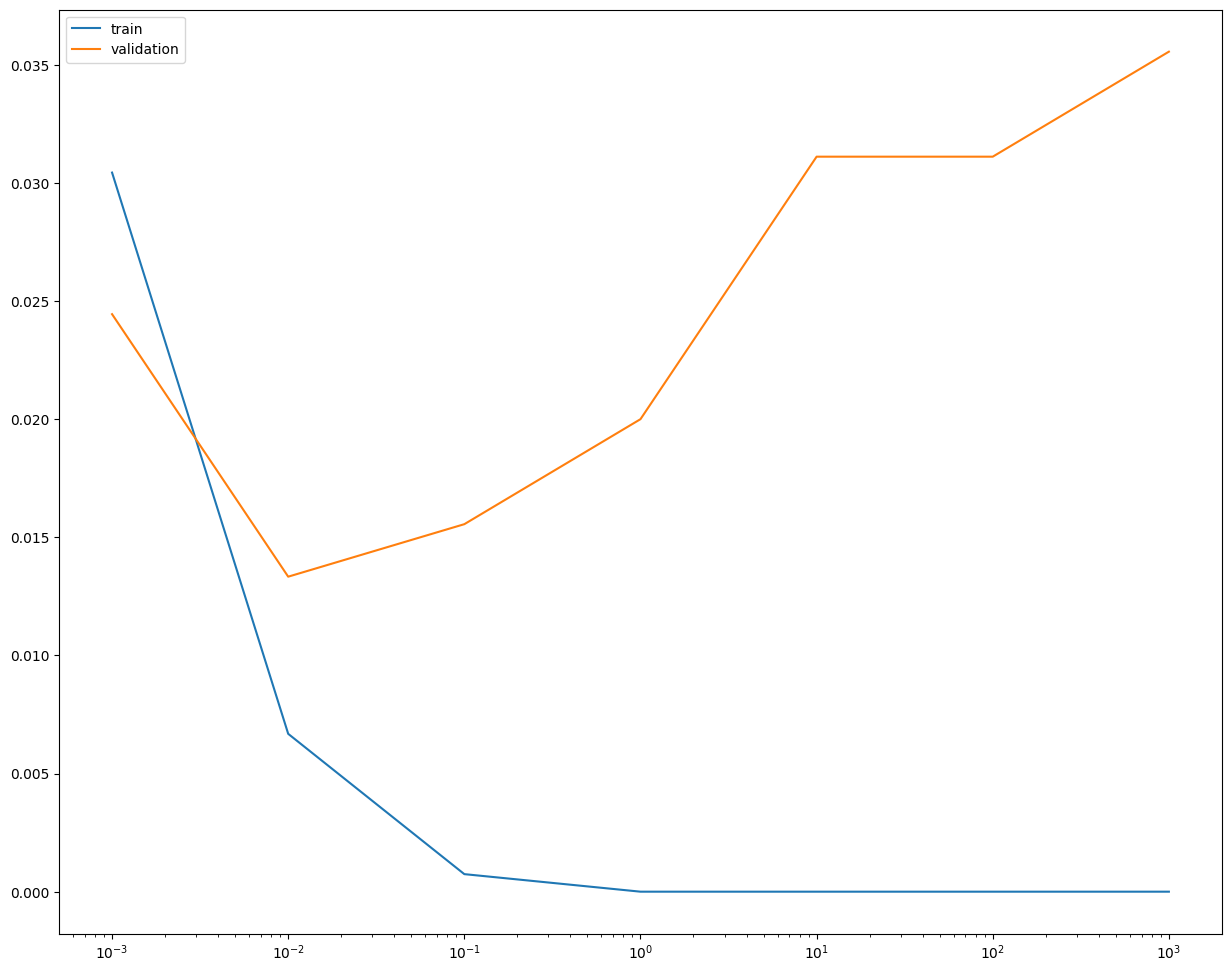

In [34]:
# Plot results
plt.figure(figsize=(15,12))
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

***Bravo! Comme vous pouvez le voir, trop de régularisation (small $C$) ne fonctionne pas bien - en raison d'un sous-ajustement - et trop peu de régularisation (large $C$) ne fonctionne pas bien non plus - en raison d'un surajustement.***


####**Régression logistique et sélection de fonctionnalités**

+ ***Dans cet exercice, nous allons effectuer une sélection de fonctionnalités sur l'ensemble de données de sentiment de critique de film à l'aide de la régularisation L1. Les fonctionnalités et les cibles sont déjà chargées pour vous dans X_train et y_train.***

+ *Nous rechercherons la meilleure valeur $C$ d'utilisation de scikit-learn GridSearchCV(), qui a été couverte dans le cours préalable.*

####**Instructions**

+ Instanciez un objet de régression logistique qui utilise la régularisation $L1$.
+ Trouvez la valeur de $C$ qui minimise l'erreur de validation croisée.
+ Imprimer le nombre d'entités sélectionnées pour cette valeur de $C$.

In [4]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import GridSearchCV

In [36]:
X_train, y_train = load_svmlight_file('/content/Train_labeledBow.feat')
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

In [37]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [38]:
# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'C': 0.1}


In [39]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Total number of features: 89523
Number of selected features: 1091


***Bon travail! Comme vous pouvez le constater, de nombreuses fonctionnalités ont été supprimées ici.***

####**Identifier les mots les plus positifs et négatifs**

+ ***Dans cet exercice, nous essaierons d'interpréter les coefficients d'un ajustement de régression logistique sur l'ensemble de données sur le sentiment des critiques de films. L'objet modèle est déjà instancié et adapté pour vous dans la variable lr.***

+ *De plus, les mots correspondant aux différentes fonctionnalités sont chargés dans la variable vocab. Par exemple, puisque vocab[100] est "penser", cela signifie que la fonctionnalité 100 correspond au nombre de fois où le mot "penser" est apparu dans cette critique de film.*

####**Instructions**

+ Trouvez les mots correspondant aux 5 plus grands coefficients.
+ Trouvez les mots correspondant aux 5 plus petits coefficients.

In [40]:
vocab = pd.read_csv('vocab.csv').to_numpy()

In [41]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten())
inds_descending = inds_ascending[::-1]

In [42]:
# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[-5]], end=", ")
print("\n")

Most positive words: ['refreshing'], ['refreshing'], ['refreshing'], ['refreshing'], ['refreshing'], 



In [43]:
# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_descending[-5]], end=", ")
print("\n")

Most negative words: ['fails'], ['fails'], ['fails'], ['fails'], ['fails'], 



***Tu l'as eu! Les réponses ont un sens, n'est-ce pas ?***

####**1. Régression logistique et probabilités**

+ ***Jusqu'à présent, nous avons utilisé la régression logistique pour faire des prédictions concrètes, c'est-à-dire que nous prédisons soit une classe, soit l'autre. Dans cette vidéo, nous verrons comment interpréter la sortie brute du modèle du classifieur comme une probabilité.***

####**2. Probabilités de régression logistique**

+ ***Nous avons vu ce type de limite de décision à plusieurs reprises dans le cours. La couleur de remplissage montre quelle classe nous prédirions pour chaque point de l'espace. Au chapitre 1, nous avons vu que l'objet de `régression logistique scikit-learn` peut générer des probabilités avec la fonction `"predict_proba"`. Faisons le même type de figure mais cette fois en montrant les probabilités.***

####**3. Probabilités de régression logistique**

+ ***Dans cette figure, la nouvelle interprétation des couleurs est la probabilité prédite de la classe rouge. La ligne noire est l'ancienne limite de décision, à laquelle nous pouvons nous référer si nous devons prendre des décisions définitives ou difficiles. Nous pouvons voir que cette ligne est l'endroit où les probabilités croisent le point-5. En d'autres termes, si nous sommes sûrs à plus de 50 % qu'il est rouge, nous prédisons le rouge, et si nous sommes sûrs à moins de 50 % qu'il est rouge, nous prédisons le bleu. Nous pouvons également voir que nous devenons de plus en plus confiants à mesure que nous nous éloignons de la limite de décision, ce qui semble raisonnable. Dans cette figure, la régularisation est effectivement désactivée car $C$ est très grand.***

####**4. Probabilités de régression logistique**

+ ***La figure de droite montre ce qui se passe lorsque nous activons la régularisation. Tout d'abord, nous voyons que les coefficients sont plus petits, comme prévu. L'effet de la régularisation est que les probabilités sont plus proches du point-5 ; on n'arrive pas au rouge très foncé ou au bleu très foncé sur la figure de droite. En d'autres termes, des coefficients plus petits signifient des prédictions moins fiables. Cela correspond à notre histoire : la régularisation est censée lutter contre le surajustement, et il existe un lien entre l'excès de confiance et le surajustement. Soit dit en passant, ces chiffres répondent également à une question que vous vous êtes peut-être posée dans le chapitre précédent. Avec 2 caractéristiques, nous avions 2 coefficients même si vous n'avez vraiment besoin que d'un seul nombre pour représenter la pente d'une ligne. Nous avons maintenant une raison à cela : le rapport des coefficients nous donne la pente de la droite, et l'amplitude des coefficients nous donne notre niveau de confiance. Enfin, comme vous pouvez le voir, la régularisation affecte non seulement la confiance, mais aussi l'orientation de la frontière.***

####**5. Comment ces probabilités sont-elles calculées ?**

+ ***Alors, comment ces probabilités sont-elles calculées ? Comme les prédictions de classe définies, elles proviennent de la sortie brute du modèle. La sortie brute du modèle peut être n'importe quel nombre, mais les probabilités sont des nombres compris entre 0 et 1. Nous avons donc besoin d'un moyen d'"écraser" la sortie brute du modèle pour qu'elle soit comprise entre 0 et 1. La fonction sigmoïde s'en charge pour nous. Voici à quoi ça ressemble. Jetez un œil à la courbe : lorsque la sortie brute du modèle est nulle, la probabilité est de 5 points - cela signifie que nous sommes juste à la frontière. Lorsque la sortie brute du modèle est positive, nous aurions prédit la classe positive, et en effet la probabilité de la classe positive approche 1. Lorsque la sortie brute du modèle est négative, nous aurions prédit la classe négative, et en effet la probabilité de la classe positive classe tend vers 0, ce qui est une autre façon de dire que nous Je suis très confiant que c'est la classe négative. Étant donné que la sortie brute du modèle augmente à mesure que nous nous éloignons de la limite, nous sommes plus confiants dans nos prédictions loin de la limite.***

####**6. Entraînons-nous !**

+ ***Il est temps d'explorer ces probabilités prédites.***

###**EXERCICES**

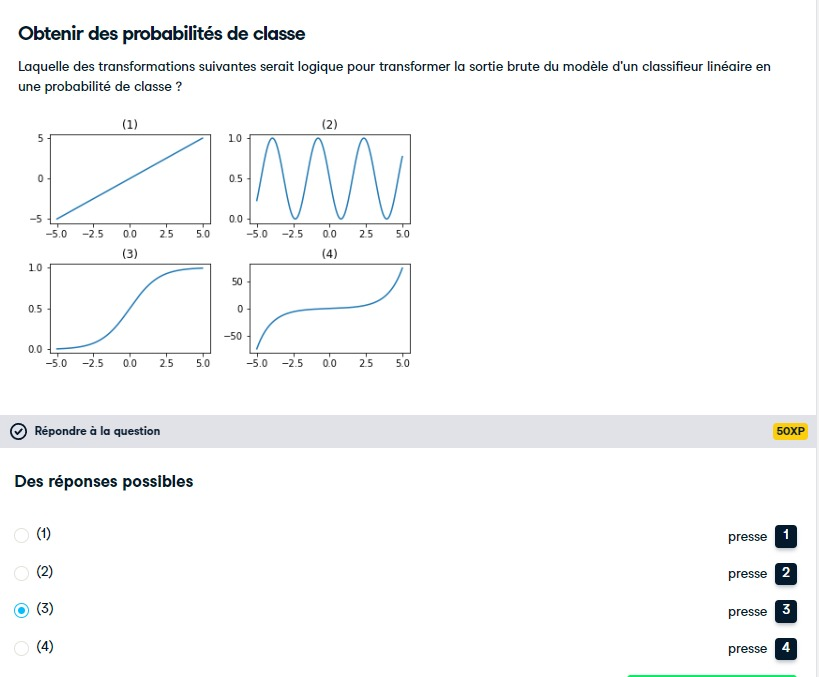

***C'est exact! La fonction dans l'image est assez similaire à la fonction logistique utilisée par la régression logistique.***

####**Régularisation et probabilités**

+ ***Dans cet exercice, vous observerez les effets de la modification de la force de régularisation sur les probabilités prédites.***

+ *Un jeu de données de classification binaire 2D est déjà chargé dans l'environnement en tant que X et y.*

####**Consignes**

+ Calculez la probabilité prédite maximale.
+ Exécutez le code fourni et jetez un œil à l'intrigue.
+ Créez un modèle avec C=0.1 et examinez comment le tracé et les probabilités changent.

In [44]:
X = pd.read_csv('binary_X.csv').to_numpy()
y = pd.read_csv('binary_y.csv').to_numpy().ravel()

<ipython-input-20-a79d2197be34>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-20-a79d2197be34>:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


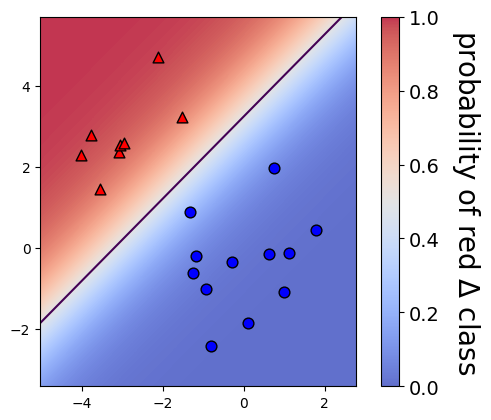

In [45]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

In [46]:
# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.9973143426900802


<ipython-input-20-a79d2197be34>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-20-a79d2197be34>:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


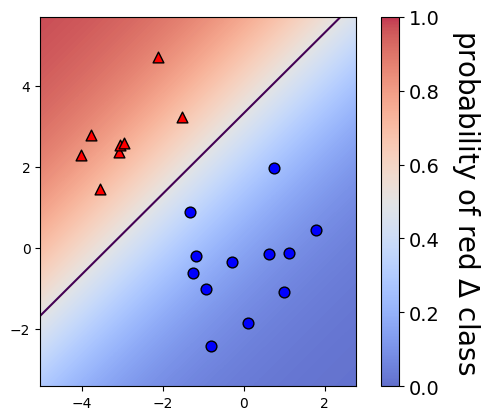

In [47]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

In [48]:
# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.9352061680350907


***Tu l'as eu! Comme vous l'avez probablement remarqué, des valeurs plus faibles de Cconduisent à des prédictions moins fiables. En effet, plus petit C signifie plus de régularisation, ce qui signifie à son tour des coefficients plus petits, ce qui signifie que les sorties brutes du modèle sont plus proches de zéro et, par conséquent, des probabilités plus proches de 0,5 après que la sortie brute du modèle a été écrasée par la fonction sigmoïde. C'est toute une chaîne d'événements!***

####**Visualiser des exemples faciles et difficiles**

+ ***Dans cet exercice, vous allez visualiser les exemples sur lesquels le modèle de régression logistique est le plus et le moins sûr en examinant les probabilités prédites les plus grandes et les plus petites.***

+ ***Le jeu de données des chiffres manuscrits est déjà chargé dans les variables $X$ et $y$. La fonction show_digit prend un index entier et trace l'image correspondante, avec quelques informations supplémentaires affichées au-dessus de l'image.***

####**Instructions**

+ ***Remplissez le premier blanc avec l' indice du chiffre sur lequel le modèle est le plus sûr.***
+ ***Remplissez le deuxième blanc avec l' indice du chiffre dont le modèle est le moins sûr.***
+ ***Observez les images : êtes-vous d'accord pour dire que la première est moins ambiguë que la seconde ?***

In [49]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray',
               vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
        plt.show()

In [50]:
X, y = digits.data, digits.target

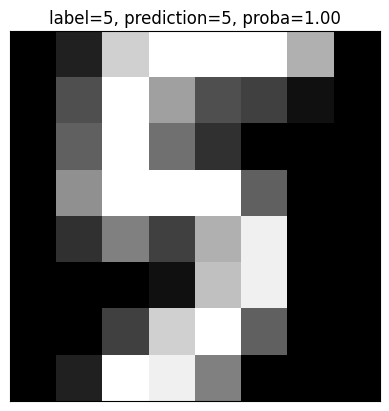

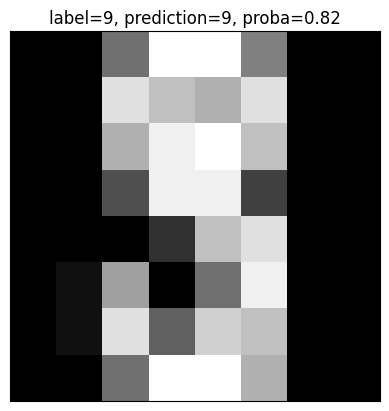

In [51]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

***Bon travail! Comme vous pouvez le voir, l'exemple le moins confiant ressemble à un 9 bizarre, et l'exemple le plus confiant ressemble à un 5 très typique.***


####**1. Régression logistique multi-classes**

+ ***La classification multi-classes signifie avoir plus de 2 classes. Bien que nous ayons utilisé scikit-learn pour effectuer une classification multi-classes, toutes nos discussions conceptuelles ont été dans le cas binaire ou à 2 classes. Dans cette vidéo, nous verrons comment fonctionne la classification multi-classes pour les classificateurs linéaires.***

####**2. Combiner des classificateurs binaires avec un-vs-rest**

+ ***Nous couvrirons deux approches populaires de la classification multi-classes. La première consiste à former une série de classificateurs binaires pour chaque classe. Par exemple, j'ai chargé le jeu de données wine et instancié 3 classificateurs de régression logistique. Je vais maintenant adapter ces classificateurs à 3 ensembles de données différents. Le code y==0 renvoie un tableau de la même taille que y qui est vrai quand y vaut 0 et faux sinon, de sorte que le classifieur apprend à prédire ces valeurs vrai/faux. En d'autres termes, c'est un classifieur binaire qui apprend à discriminer entre la classe 0 ou non 0. Le suivant apprend y=1 vs not 1, etc. C'est ce qu'on appelle la stratégie one-vs-rest. Afin de faire des prédictions en utilisant one-vs-rest, nous prenons la classe dont le classifieur donne la plus grande sortie de modèle brute - ou decision_function, dans la terminologie scikit-learn. Dans ce cas, la plus grande sortie de modèle brut provient du classificateur 0. Cela signifie qu'il est plus sûr que la classe est 0 que n'importe laquelle des autres classes, nous prédisons donc la classe 0. Nous pouvons simplement laisser scikit-learn faire le travail en ajustant un modèle de régression logistique sur l'ensemble de données multiclasse d'origine, en définissant le paramètre multiclasse sur "ovr". Nous obtenons la même prédiction, de 0, comme prévu.***

####**3. Un contre repos contre multinomial/softmax**

+ ***Une autre façon d'obtenir une classification multi-classes avec régression logistique consiste à modifier la fonction de perte afin qu'elle tente directement d'optimiser la précision sur le problème multi-classes. Vous pouvez rencontrer divers mots liés à cela, comme la régression logistique multinomiale, softmax ou la perte d'entropie croisée. La diapositive montre une comparaison des deux approches. Dans un cas, vous vous adaptez séparément à chaque classe, tandis que dans l'autre, vous ne le faites qu'une seule fois. Il en va de même pour la prédiction. Une propriété attrayante de l'approche binaire est que vous pouvez réutiliser votre implémentation de classificateur binaire plutôt que d'en avoir besoin d'une nouvelle. D'un autre côté, vous pouvez parfois obtenir une meilleure précision avec le classificateur multinomial car sa perte est plus directement alignée sur la précision. Dans le domaine des réseaux de neurones, l'approche multinomiale est classique. Enfin, alors que les deux approches peuvent fonctionner pour les SVM, les stratégies one-vs-rest et associées ont tendance à être plus populaires. Soit dit en passant, ces deux méthodes peuvent produire des probabilités comme un classificateur binaire.***

####**4. Coefficients du modèle pour multi-classes**

+ ***Nous avons beaucoup parlé des coefficients, il est donc naturel de se demander, à quoi ressemblent les coefficients pour la classification multi-classes ? En continuant avec l'ensemble de données sur le vin, adaptons un modèle un contre repos et examinons les coefficients. Dans le cas binaire, nous avions un coefficient par entité et une interception. Pour 3 classes, nous avons maintenant 3 classificateurs binaires entiers, nous nous retrouvons donc avec un coefficient par entité par classe et une interception par classe. Par conséquent, les coefficients de ce modèle sont stockés dans un tableau 3 par 13. Nous pouvons instancier la version multinomiale en définissant l'argument multi_class sur multinomial, qui est également la valeur par défaut pour la classification non binaire. Comme nous pouvons le voir, le classificateur multinomial a le même nombre de coefficients et d'interceptions qu'un-vs-rest. Bien que ces deux approches fonctionnent différemment,***

####**5. Entraînons-nous !**

+ ***À vous d'explorer ces deux approches multi-classes.***

###**EXERCICES**

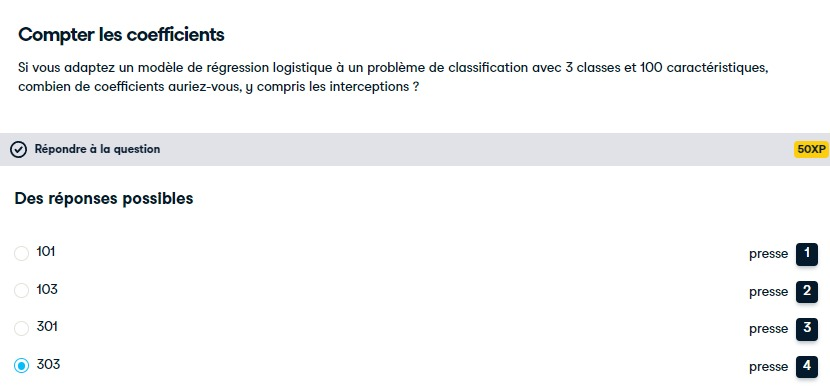

***Bien fait! N'hésitez pas à tester cela avec scikit-learn !***

####**Ajustement de la régression logistique multi-classes**

+ ***Dans cet exercice, vous allez ajuster les deux types de régression logistique multi-classes, one-vs-rest et softmax/multinomial, sur l'ensemble de données manuscrites et comparer les résultats. Le jeu de données des chiffres manuscrits est déjà chargé et divisé en X_train, y_train, X_test et y_test.***

####**Instructions**

+ Ajustez un classificateur de régression logistique un vs reste en définissant le paramètre multi_class et rapportez les résultats.
+ Ajustez un classificateur de régression logistique multinomiale en définissant le paramètre multi_class et rapportez les résultats.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [53]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class="ovr", max_iter=10000)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

OVR training accuracy: 0.9977728285077951
OVR test accuracy    : 0.9644444444444444


In [54]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


***Bon travail! Comme vous pouvez le voir, les précisions des deux méthodes sont assez similaires sur cet ensemble de données.***

####**Visualisation de la régression logistique multi-classes**

+ ***Dans cet exercice, nous continuerons avec les deux types de régression logistique multi-classes, mais sur un jeu de données 2D spécialement conçu pour briser le schéma un contre reste.***

+ ***L'ensemble de données est chargé dans X_train et y_train. Les deux objets de régression logistique, lr_mn et lr_ovr, sont déjà instanciés (avec C=100), ajustés et tracés.***

+ *Remarquez que lr_ovr ne prédit jamais la classe bleu foncé… beurk ! Explorons pourquoi cela se produit en traçant l'un des classificateurs binaires qu'il utilise dans les coulisses.*

####**Instructions**

+ Créez un nouvel objet de régression logistique (également avec C=100) à utiliser pour la classification binaire.
+ Visualisez ce classifieur binaire avec plot_classifier… est-ce que ça vous semble raisonnable ?

In [60]:
X_train = pd.read_csv('toy_X_train.csv').to_numpy()
y_train = pd.read_csv('toy_y_train.csv').to_numpy().ravel()

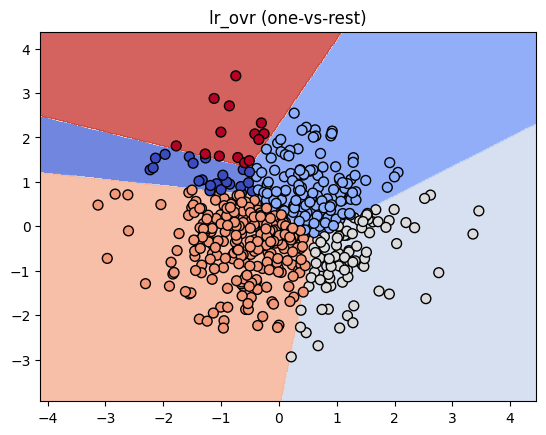

In [61]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=10000, C=100)
lr_ovr.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_ovr (one-vs-rest)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

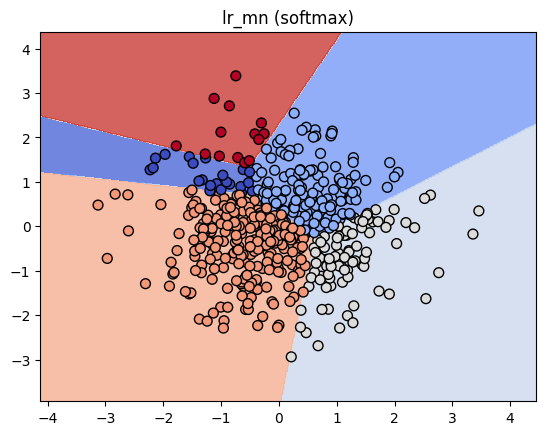

In [62]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_mn (softmax)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

Softmax     training accuracy: 0.952
One-vs-rest training accuracy: 0.996


<ipython-input-20-a79d2197be34>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-20-a79d2197be34>:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


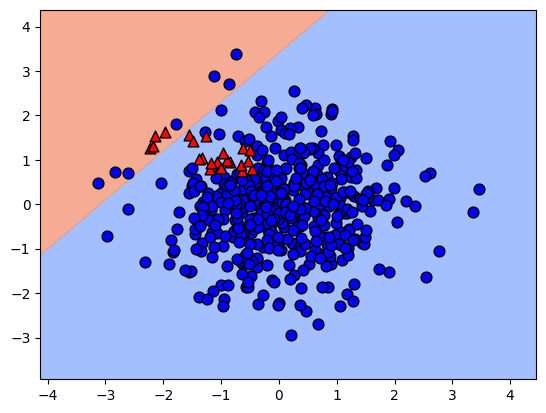

In [63]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1 )

***Bon travail! Comme vous pouvez le voir, le classificateur binaire étiquette de manière incorrecte presque tous les points de la classe 1 (représentés par des triangles rouges dans le tracé final) ! Ainsi, ce classificateur n'est pas un composant très efficace du classificateur one-vs-rest. En général, cependant, un contre repos fonctionne souvent bien.***


####**SVM un contre reste**
+ ***Comme motivation pour le prochain et dernier chapitre sur les machines à vecteurs de support, nous allons répéter l'exercice précédent avec une SVM non linéaire. Une fois de plus, les données sont chargées dans X_train, y_train, X_test et y_test.***

+ *Au lieu d'utiliser LinearSVC, nous allons maintenant utiliser l'objet SVC de scikit-learn, qui est un SVM "noyau" non linéaire (vous en saurez plus sur ce que cela signifie au chapitre 4 !). Encore une fois, votre tâche consiste à créer un graphique du classificateur binaire pour la classe 1 par rapport au reste.*

####**Instructions**

+ Ajustez un SVC appelé svm_class_1 pour prédire la classe 1 par rapport aux autres classes.
+ Tracez ce classificateur.

<ipython-input-20-a79d2197be34>:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
<ipython-input-20-a79d2197be34>:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


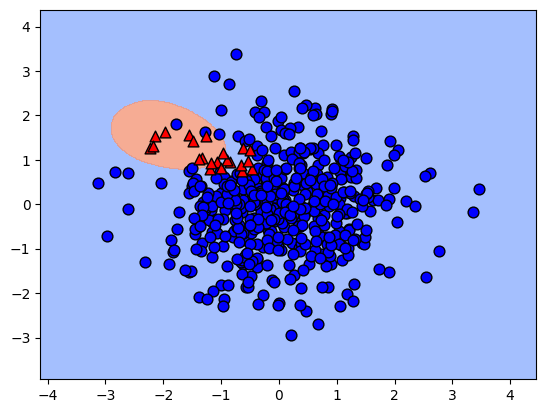

In [64]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

####**1. Vecteurs de soutien**

+ ***Bienvenue dans le dernier chapitre du cours, où nous discuterons plus en détail des SVM. Dans cette première vidéo, nous discuterons de ce que sont les vecteurs de support et pourquoi ils sont importants.***

####**2. Qu'est-ce qu'un SVM ?**

+ ***Dans le dernier chapitre, nous avons parlé de la régression logistique, qui est un classifieur linéaire appris avec la fonction de perte logistique. Les SVM linéaires sont également des classificateurs linéaires, mais ils utilisent à la place la perte de charnière. La définition standard d'une SVM inclut également la régularisation L2. Vous souvenez-vous de ces diagrammes du chapitre 2 ? Les pertes logistiques et charnières semblent assez similaires. Une différence clé réside dans la partie "plate" de la perte de charnière, qui se produit lorsque la sortie brute du modèle est supérieure à 1, ce qui signifie que vous avez correctement prédit un exemple au-delà d'une certaine marge d'erreur. Si un exemple d'entraînement se situe dans cette région "zéro perte", il ne contribue pas à l'ajustement ; si je supprimais cet exemple, rien ne changerait. C'est une propriété clé des SVM***.

####**3. Que sont les vecteurs de support ?**

+ ***Les vecteurs de support sont définis comme des exemples qui ne figurent PAS dans la partie plate du diagramme de perte. Dans la figure, les vecteurs de support sont représentés par des cercles jaunes autour d'eux. Une autre façon de définir les vecteurs de support est qu'ils incluent des exemples mal classés, ainsi que des exemples correctement classés qui sont proches de la frontière. Si vous vous demandez à quel point la proximité est considérée comme suffisamment proche, cela est contrôlé par la force de régularisation. Les vecteurs de support sont les exemples qui comptent pour votre ajustement. Si un exemple n'est pas un vecteur de support, sa suppression n'a aucun effet sur le modèle, car sa perte était déjà nulle. Même si nous utilisons le nom de "vecteurs de support", ce sont vraiment les vecteurs sans support qui sont remarquables. En comparaison avec la régression logistique, il n'y a pas de partie plate de la perte là-bas, et donc tous les points de données sont importants pour l'ajustement. La popularité des SVM repose sur le fait que les SVM du noyau, présentées plus loin dans ce chapitre, sont étonnamment rapides à adapter et à prédire. Une partie de la vitesse provient d'algorithmes intelligents dont le temps d'exécution n'évolue qu'avec le nombre de vecteurs de support, plutôt qu'avec le nombre total d'exemples de formation.***

####**4. Point de vue de la marge maximale**

+ ***Bien que ce ne soit pas la perspective que nous avons adoptée dans ce cours, vous pouvez rencontrer l'idée que les SVM "maximisent la marge". Je veux mentionner brièvement ce point de vue pour être complet. Le diagramme montre un ajustement SVM sur un ensemble de données linéairement séparables. Comme vous pouvez le voir, la frontière apprise se situe juste à mi-chemin entre les deux classes. C'est une propriété intéressante : en l'absence d'autres informations, cette frontière a plus de sens qu'une frontière beaucoup plus proche d'une classe que de l'autre.***

####**5. Point de vue de la marge maximale**

+ ***Les lignes jaunes montrent les distances entre les vecteurs de support et la frontière. La longueur des lignes jaunes, qui est la même pour les 3 cas, s'appelle la marge. Si la force de régularisation n'est pas trop grande, les SVM maximisent la marge des ensembles de données linéairement séparables. Malheureusement, la plupart des ensembles de données ne sont pas linéairement séparables ; en d'autres termes, nous ne nous attendons généralement pas à une précision d'entraînement de 100 %. Bien que ces idées de marge maximale puissent être étendues aux données non séparables, nous ne poursuivrons pas cette voie ici. Vous pouvez considérer cela comme une autre vision de ce que nous avons déjà défini comme étant les SVM, à savoir la perte de charnière avec la régularisation L2. Il s'avère qu'ils sont mathématiquement équivalents.***

####**6. Entraînons-nous !**

+ ***Le temps joue avec les vecteurs de support.***

###**EXERCICES**

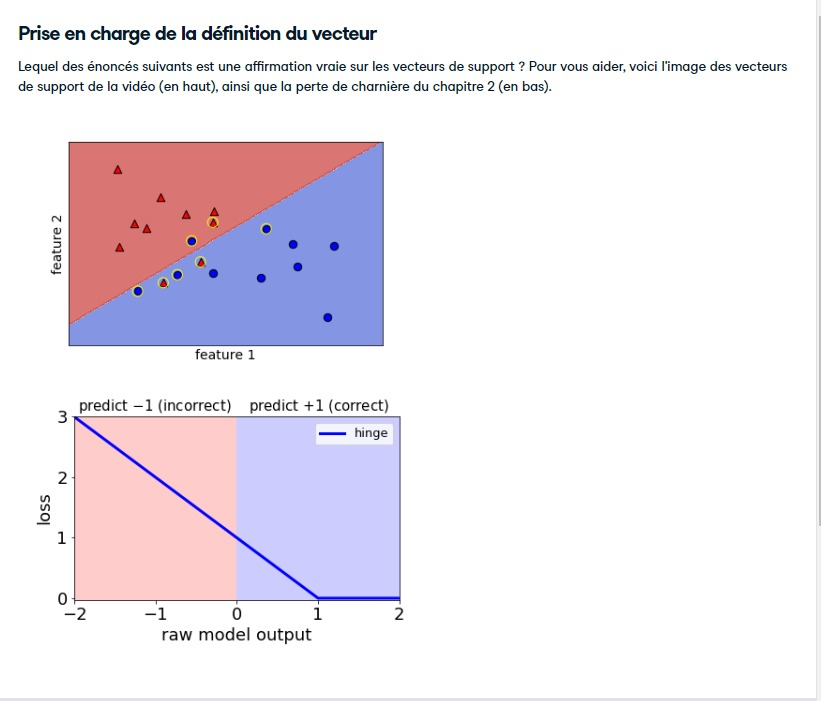


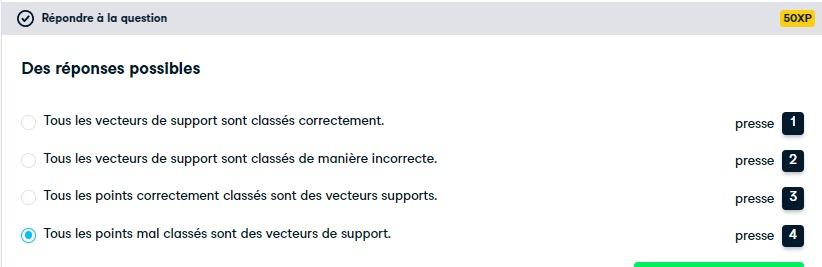

***Beau travail, vous l'avez compris !***

####**Effet de la suppression des exemples**
+ ***Les vecteurs de support sont définis comme des exemples d'apprentissage qui influencent la limite de décision. Dans cet exercice, vous observerez ce comportement en supprimant les vecteurs sans support de l'ensemble d'apprentissage.***

+ ***L'ensemble de données sur la qualité du vin est déjà chargé dans $X$ et $y$(deux premières fonctionnalités uniquement). (Remarque : nous spécifions limsin plot_classifier()afin que les deux tracés soient obligés d'utiliser les mêmes limites d'axe et puissent être comparés directement.)***

####**Instructions**

+ Entraînez un SVM linéaire sur l'ensemble du jeu de données.
+ Créez un nouvel ensemble de données contenant uniquement les vecteurs de support.
+ Entraînez un nouveau SVM linéaire sur le plus petit ensemble de données.

In [68]:
X = pd.read_csv('wine_X.csv').to_numpy()
y = pd.read_csv('wine_y.csv').to_numpy().ravel()

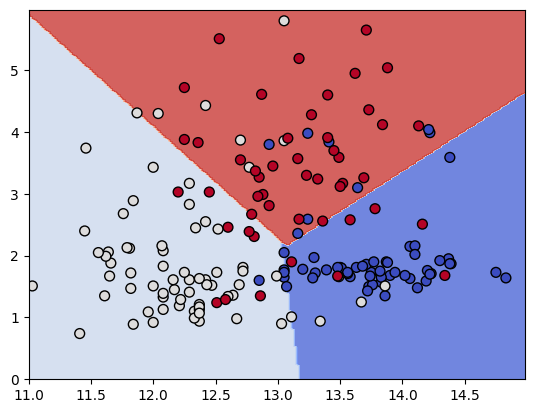

In [69]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

In [70]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

Number of original examples 178
Number of support vectors 81


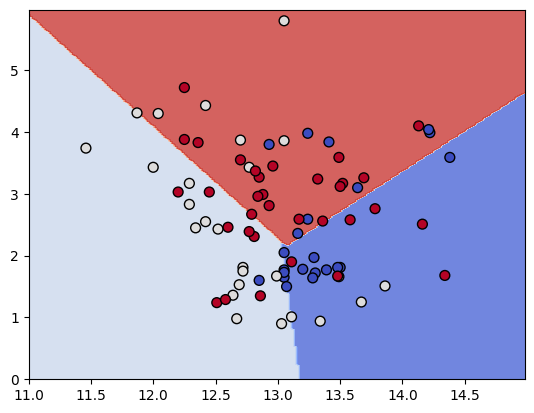

In [71]:
# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small,y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

***Bon! Comparez les limites de décision des deux modèles entraînés : sont-elles identiques ? Selon la définition des vecteurs de support, ils devraient l'être !***

####**1. SVM du noyau**

+ ***Dans cette vidéo, nous verrons comment ajuster les frontières non linéaires à l'aide de classificateurs linéaires.***

####**2. Transformer vos fonctionnalités**

+ ***Considérez cet ensemble de données de jouets 2D. Les deux classes ne sont pas linéairement séparables ; en d'autres termes, il n'y a pas de frontière linéaire qui classe parfaitement tous les points. Si vous essayez d'ajuster un SVM linéaire sur ces points, vous pourriez obtenir quelque chose qui prédit du bleu partout.***


####**3. Transformer vos fonctionnalités**

+ ***Cependant, notez que les points rouges sont tous proches du point (0,0) dans le système de coordonnées. Créons deux nouvelles entités, dont l'une est l'entité 1 au carré et l'autre est l'entité 2 au carré. Cela signifie que les valeurs proches de zéro deviendront de petites valeurs et que les valeurs éloignées de zéro, à la fois positives et négatives, deviendront grandes. Que se passe-t-il maintenant si nous traçons les points ?***

####**4. Transformer vos fonctionnalités**

+ ***Eh bien, maintenant ils sont linéairement séparables dans cet univers transformé, car tous les points rouges sont près du coin inférieur gauche et tous les points bleus sont au-dessus et à droite. Nous pouvons adapter un SVM linéaire en utilisant ces nouvelles fonctionnalités et***

####**5. Transformer vos fonctionnalités**

+ ***le résultat est une classification parfaite. Mais alors nous pourrions nous demander à quoi ressemble cette frontière linéaire dans l'espace d'origine. En d'autres termes, si nous prenions ces axes et les équarrissions, qu'adviendrait-il de la forme de la frontière ?***

####**6. Transformer vos fonctionnalités**

+ ***Dans ce cas, on obtient une ellipse. Alors, quel est le message à retenir ici ? C'est que l'ajustement d'un modèle linéaire dans un espace transformé correspond à l'ajustement d'un modèle non linéaire dans l'espace d'origine. Bon! En général, la transformation ne sera pas toujours au carré et la frontière ne sera pas toujours une ellipse. En fait, le nouvel espace a souvent un nombre de dimensions différent de l'espace d'origine ! Mais c'est l'idée de base. Les noyaux et les SVM du noyau implémentent des transformations de fonctionnalités de manière efficace sur le plan informatique.***

####**7. SVM du noyau**

+ ***Regardons un peu de code. Nous devrons utiliser la classe SVC de scikit-learn, plutôt que LinearSVC, pour permettre différents noyaux. Le comportement par défaut est ce qu'on appelle un noyau RBF ou Radial Basis Function. Bien que ce ne soit pas calculé de cette façon, vous pouvez considérer cela comme une transformation extrêmement compliquée des entités, suivie de l'ajustement d'une limite linéaire dans ce nouvel espace, tout comme nous l'avons vu pour la transformation au carré plus simple. Bien qu'il existe de nombreux noyaux non linéaires, dans ce cours, nous nous concentrerons sur le RBF. Avec les SVM du noyau, nous pouvons appeler fit et predict de toutes les manières habituelles. Regardons une limite de décision. Ce n'est certainement pas linéaire ! Et, par conséquent, nous avons obtenu une précision d'entraînement supérieure à celle que nous aurions pu avoir avec une limite linéaire. Nous pouvons contrôler la forme de la frontière en utilisant les hyperparamètres. Comme d'habitude, nous avons l'hyperparamètre C qui contrôle la régularisation. Le noyau RBF introduit également un nouvel hyperparamètre, gamma, qui contrôle le lissage de la frontière. En diminuant le gamma, nous pouvons rendre les frontières plus lisses.***

####**8. SVM du noyau**

+ ***La deuxième image montre le même ensemble de données avec gamma défini sur le point-01. La frontière semble plus lisse.***

####**9. SVM du noyau**

+ ***La troisième image montre gamma=2. Nous avons maintenant atteint une précision d'entraînement de 100 % en créant une petite "île" de bleu autour de chaque exemple d'entraînement bleu. En fait, avec les bons hyperparamètres, les SVM RBF sont capables de séparer parfaitement presque tous les ensembles de données. Alors, pourquoi ne pas toujours utiliser la plus grande valeur de gamma et obtenir la plus grande précision d'entraînement possible ? Vous l'avez deviné : sur-ajustement. Dans les exercices, vous explorerez comment les hyperparamètres du noyau affectent le compromis entre la formation et la précision des tests.***

####**10. Entraînons-nous !**

+ ***Il est temps d'expérimenter les SVM du noyau.***

###**EXERCICES**

####**Échauffement GridSearchCV**
+ ***Dans la vidéo, nous avons vu que l'augmentation de l'hyperparamètre du noyau RBF gammaaugmente la précision de l'entraînement. Dans cet exercice, nous allons rechercher le gammaqui maximise la précision de la validation croisée à l'aide de scikit-learn GridSearchCV. Une version binaire de l'ensemble de données de chiffres manuscrits, dans lequel vous essayez simplement de prédire si une image est ou non un "2", est déjà chargée dans les variables $X$ et $y$.***

####**Instructions**

+ Créer un objet GridSearchCV.
+ Appelez la méthode fit() pour sélectionner la meilleure valeur de gammabasée sur la précision de la validation croisée.

In [72]:
X = pd.read_csv('digits_2_X.csv').to_numpy()
y = pd.read_csv('digits_2_y.csv').astype('bool').to_numpy().ravel()

In [73]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


***Bon travail! Des valeurs plus élevées de gammasont meilleures pour la précision de l'entraînement, mais la validation croisée nous a aidés à trouver quelque chose de différent (et de meilleur !).***

####**Réglage conjoint du gamma et du C avec GridSearchCV**

+ **Dans l'exercice précédent, la meilleure valeur de gammaétait de 0,001 en utilisant la valeur par défaut de C, qui est 1. Dans cet exercice, vous allez rechercher la meilleure combinaison de C et enutilisant   gamma GridSearchCV.***

+ ***Comme dans l'exercice précédent, le jeu de données à 2 chiffres plutôt qu'à 2 chiffres est déjà chargé, mais cette fois il est divisé en variables X_train, y_train, X_test et y_test. Même si la validation croisée divise déjà l'ensemble d'apprentissage en plusieurs parties, il est souvent judicieux de proposer un ensemble de tests distinct pour s'assurer que les résultats de la validation croisée sont pertinents.***

####**Instructions**

+ Exécuter GridSearchCV pour trouver les meilleurs hyperparamètres à l'aide de l'ensemble d'entraînement.
+ Imprimer les meilleures valeurs des paramètres.
+ Imprimez la précision sur l'ensemble de test, qui n'a pas été utilisé pendant la procédure de validation croisée.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.9970259812050856
Test accuracy of best grid search hypers: 1.0


***Tu l'as eu! Notez que la meilleure valeur de gamma, 0,0001, est différente de la valeur de 0,001 que nous avons obtenue dans l'exercice précédent, lorsque nous avons fixé C=1. Les hyperparamètres peuvent s'influencer les uns les autres !***

####**1. Comparaison de la régression logistique et du SVM**

+ ***Dans cette vidéo, nous allons comparer nos deux classificateurs linéaires, la régression logistique et les SVM.***

####**2. Avantages et inconvénients**

+ ***Résumons les points que nous avons abordés tout au long du cours. La régression logistique et le SVM sont des classificateurs linéaires. Les deux peuvent être utilisés avec les noyaux, mais cela est plus courant avec les SVM car les prédictions sont beaucoup plus rapides lorsque le nombre de vecteurs de support est faible. Bien que les deux puissent être contraints aux probabilités de sortie, cela est beaucoup plus naturel avec la régression logistique. Les deux peuvent être étendus à plusieurs classes avec un schéma un contre repos ou en modifiant directement la perte. Dans la régression logistique, comme la plupart des méthodes, tous les points de données affectent l'ajustement. Les SVM ont la propriété spéciale que seul un sous-ensemble des exemples sont des "vecteurs de support" et le reste peut être supprimé sans affecter l'ajustement. Alors que le terme "régression logistique" ne fait pas référence à un type particulier de régularisation, le terme "SVM"***

####**3. Utilisation dans scikit-learn**

+ ***Comparons l'utilisation de nos deux méthodes dans `scikit-learn`. La régression logistique est importée via `sklearn.linear_model.LogisticRegression`. Et quels sont ses hyperparamètres clés ? `Le premier est C, qui contrôle la quantité de régularisation` : plus petit C signifie plus de régularisation et vice versa. Vient ensuite le type de régularisation : `scikit-learn prend en charge L2 et L1`. Nous avons également discuté des méthodes pour étendre un classificateur binaire à plusieurs classes. Cet hyperparamètre affectera probablement moins vos résultats que les deux précédents. Scikit-learn expose un tas d'autres hyperparamètres, mais ce sont ceux que je considère comme les plus fondamentaux. N'ayez pas peur de lire le reste ! Quant aux SVM, ils peuvent être instanciés à partir de sklearn.svm en utilisant LinearSVC pour un SVM linéaire ou SVC pour un noyau SVM.****

####**4. Utilisation dans scikit-learn (suite)**

+ ***Les hyperparamètres clés de la classe SVC sont C, tout comme avec la régression logistique. le type de noyau - nous n'avons parlé que de linéaire et de RBF, mais scikit learn en prend en charge quelques autres. et gamma, qui ne s'applique qu'au noyau RBF et contrôle le lissage. Des valeurs plus petites de gamma conduisent à des frontières de décision plus lisses ou plus simples, et des valeurs plus élevées de gamma conduisent à des frontières plus complexes. Comme avec LogisticRegression, il y a certainement plus d'hyperparamètres et je vous encourage à les vérifier.***

####**5. Classificateur SGD**

+ ***Enfin, je souhaite attirer votre attention sur le SGDClassifier de scikit-learn. SGD signifie descente de gradient stochastique. Bien que nous n'ayons pas couvert SGD dans ce cours, il vaut la peine de connaître SGDClassifier, car il peut gérer de très grands ensembles de données bien mieux que les autres méthodes dont nous avons parlé. Nous avons parlé du fait que la régression logistique et le SVM ne sont que deux types de classificateurs linéaires, et SGDClassifier ramène vraiment ce point à la maison. En fait, pour basculer entre la régression logistique et un SVM linéaire, il suffit de définir l'hyperparamètre de perte du SGDClassifier. C'est comme nous l'avons dit : le modèle est le même, et seule la perte change. SGDClassifier fonctionne à peu près comme les autres méthodes scikit-learn que nous avons vues. Un "j'ai eu" avec SGDClassifier est que l'hyperparamètre de régularisation est appelé alpha au lieu de C, et un alpha plus grand signifie plus de régularisation. Fondamentalement, alpha est l'inverse de C.***

####**6. Entraînons-nous !**

+ ***Maintenant c'est ton tour.***

###**EXERCICES**

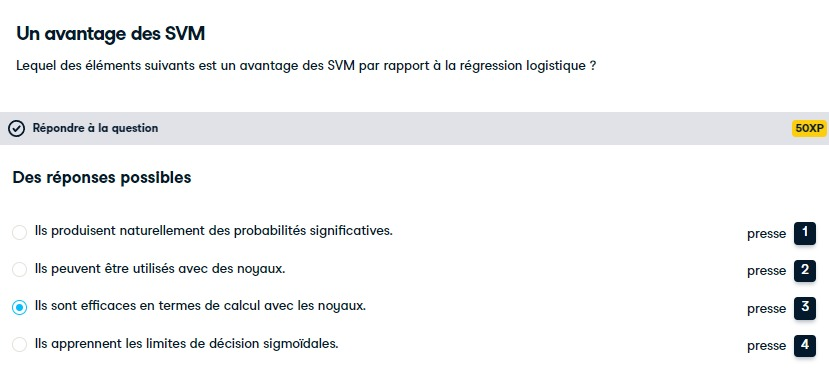

***C'est exact! Le fait d'avoir un nombre limité de vecteurs de support rend les SVM du noyau efficaces en termes de calcul.***

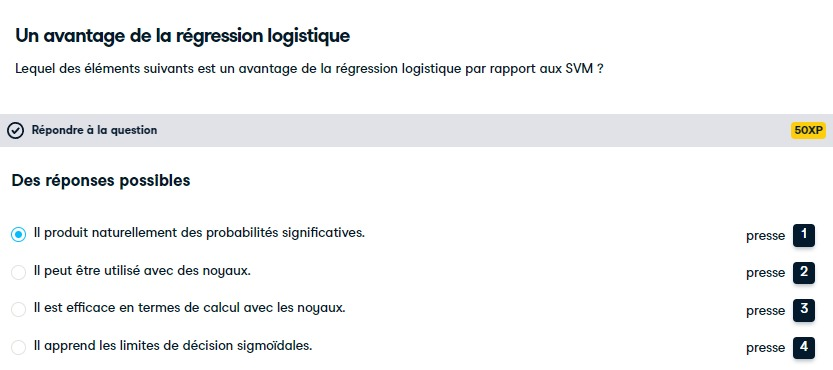

####**Utilisation de SGDClassifier**

+ ***Dans cet exercice de codage final, vous effectuerez une recherche d'hyperparamètres sur la force de régularisation et la perte (régression logistique par rapport à SVM linéaire) à l'aide de SGDClassifier().***

####**Instructions**

+ Instanciez une instance SGDClassifier avec random_state=0.
+ Recherche sur la force de régularisation et les pertes hinge vs.log_loss

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# We set random_state=0 for reproducibility
linear_classifier = SGDClassifier(random_state=0, max_iter=10000)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
             'loss':['hinge', 'log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(max_iter=10000, random_state=0),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log_loss']})

In [8]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.01, 'loss': 'log_loss'}
Best CV accuracy 0.9561912658927584
Test accuracy of best grid search hypers: 0.9511111111111111


***Félicitations, vous avez terminé le dernier exercice du cours ! L'un des avantages de SGDClassifierest qu'il est très rapide - cela aurait pris beaucoup plus de temps avec LogisticRegressionou LinearSVC.***